### Exploratory Analysis
The Census Income dataset has 48,842 entries. Each entry contains the following information about an individual:
1.	age: the age of an individual
    o	Integer greater than 0
2.	workclass: a general term to represent the employment status of an individual
    o	Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3.	fnlwgt: this is the number of people the census believes the entry represents.
    o	Integer greater than 0
4.	education: the highest level of education achieved by an individual.
    o	Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5.	education-num: the highest level of education achieved in numerical form.
    o	Integer greater than 0
6.	marital-status: marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces.
    o	Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7.	occupation: the general type of occupation of an individual
    o	Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-
    inspct,Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8.	relationship: represents what this individual is relative to others. For example an individual could be a Husband. 
        Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of 
        this attribute at all
    o	Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9.	race: Descriptions of an individual’s race
    o	White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10.	sex: the biological sex of the individual
    o	Male, female
11.	capital-gain: capital gains for an individual
    o	Integer greater than or equal to 0
12.	capital-loss: capital loss for an individual
    o	Integer greater than or equal to 0
13.	hours-per-week: the hours an individual has reported to work per week
    o	continuous
14.	native-country: country of origin for an individual
    o	United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
15.	the label: whether or not an individual makes more than $50,000 annually.
    o	<= 50K, >50K
The original dataset contains a distribution of 23.93% entries labeled with >50k and 76.07% entries labeled with <=50k. We split the dataset into training and test sets while maintaining the above distribution. The following graphs and statistics pertain to the training set.


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
data = pd.read_csv('adult.csv')

In [6]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
data.shape

(48842, 15)

In [9]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
# checking for any non required values in age column
# the output of value counts will have two columns, one with values and other with their frequency
data['age'].value_counts().index.to_list()
# observation - no question marks or symbols

[36,
 35,
 33,
 23,
 31,
 34,
 37,
 28,
 30,
 38,
 32,
 41,
 27,
 29,
 24,
 39,
 25,
 40,
 22,
 42,
 26,
 20,
 43,
 46,
 21,
 45,
 47,
 44,
 19,
 51,
 50,
 18,
 49,
 48,
 52,
 53,
 55,
 54,
 17,
 56,
 58,
 57,
 59,
 61,
 60,
 62,
 64,
 63,
 65,
 67,
 66,
 68,
 69,
 70,
 72,
 71,
 73,
 74,
 75,
 76,
 90,
 77,
 80,
 81,
 78,
 79,
 82,
 84,
 83,
 88,
 85,
 87,
 89,
 86]

In [11]:
# checking for any non required values in workclass column
data['workclass'].value_counts()

#Oberservation - there are 2799 question mark values
# We wish to replace them with null values

data['workclass'] = data['workclass'].replace('?', np.nan)
data['workclass'].isnull().sum()

2799

In [12]:
# checking for any non required values in fnlwgt column
data['fnlwgt'].value_counts().index.to_list()
# checking if all values are numeric
c = data['fnlwgt'].apply(lambda x: str(x).isnumeric())
c.value_counts()

# therefore all values are numeric in nature.

True    48842
Name: fnlwgt, dtype: int64

In [13]:
# to check if the column num contains any alphabet
# the string method - The isalpha() method returns True if all the characters are alphabet letters (a-z).
# the string method - The isnumeric() method returns True if all the characters are numeric (0-9), otherwise False.
#    Exponents, like ² and ¾ are also considered to be numeric values."-1" and "1.5" are NOT considered numeric values, 
#    because all the characters in the string must be numeric, and the - and the . are not.

# a = df['num'].apply(lambda x: str(x).isalpha())
# b = df['num'].apply(lambda x: str(x).isnumeric())
# a.value_counts()
# b.value_counts()

In [14]:
# checking for any non required values in education column
data['education'].value_counts()
# no irrelevant data like ? in the column

# 16 = doctorate
# 15 = Prof-school
# 14 = Masters
# 13 = Bachelors
# 12 = Assoc-acdm
# 11 = Assoc-voc
# 10 = Some-college
# 9 = HS-grad
# 8 = 12th
# 7 = 11th
# 6 = 10th
# 5 = 9th
# 4 = 7th-8th
# 3 = 5th-6th
# 2 = 1st-4th
# 1 = Preschool

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [15]:
# checking for any non required values in educational-num column
data['educational-num'].value_counts()
# no irrelevant data like ? in the column

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

In [16]:
# checking for any non required values in marital-status column
data['marital-status'].value_counts()

# Married-civ-spouse corresponds to a civilian spouse
# Married-AF-spouse is a spouse in the Armed Forces.

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [17]:
# checking for any non required values in occupation column
data['occupation'].value_counts()
# there are 2809 ? values. replacing them with nul values
data['occupation'] = data['occupation'].replace('?', np.nan)
data['occupation'].isnull().sum()

2809

In [18]:
# checking for any non required values in relationship column
data['relationship'].value_counts()

# No nul values

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [19]:
# checking for any non required values in race column
data['race'].value_counts()
# No null values

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [20]:
# checking for any non required values in gender column
data['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

In [21]:
# checking for any non required values in capital-gain column
data['capital-gain'].value_counts()

d = data['capital-gain'].apply(lambda x: str(x).isnumeric())
d.value_counts()
# all the values are numeric

True    48842
Name: capital-gain, dtype: int64

In [22]:
# checking for any non required values in capital-loss column
data['capital-loss'].value_counts()

e = data['capital-gain'].apply(lambda x: str(x).isnumeric())
e.value_counts()
# all the values are numeric

True    48842
Name: capital-gain, dtype: int64

In [23]:
# checking for any non required values in hours-per-week column
data['hours-per-week'].value_counts().index.to_list()
data['hours-per-week'].apply(lambda x: str(x).isnumeric()).value_counts()
# all the values are numeric

True    48842
Name: hours-per-week, dtype: int64

In [24]:
# checking for any non required values in native-country column
data['native-country'].value_counts()
# contains ? replacing them with null values
data['native-country'] = data['native-country'].replace('?', np.nan)
data['native-country'].isnull().sum()

857

In [25]:
# checking for any non required values in income column
data['income'].value_counts()
# no null or symbols in the income column

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [26]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [27]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### Missing Values Treatment
    1. We have identified special symbols like ? in the data set and replaced them with null values
    2. Now we would replace the null values using mean, median or mode depending on the type of column
    3. For numeric column we would use mean and for categorical column we would use mode.

In [28]:
# work class is categorical variable and therefore we replace it with mode
mode = data['workclass'].mode()[0]
print(mode)
data['workclass'].fillna(mode, inplace = True)
data['workclass']

Private


0             Private
1             Private
2           Local-gov
3             Private
4             Private
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 48842, dtype: object

In [29]:
# occupation is a categorical variable and therefore we would replace null values by its mode
mode1 = data['occupation'].mode()[0]
print(mode1)
#data['occupation'].fillna(mode1, inplace = True)
data['occupation'] = data['occupation'].replace(np.nan, mode1)
data['occupation']

Prof-specialty


0        Machine-op-inspct
1          Farming-fishing
2          Protective-serv
3        Machine-op-inspct
4           Prof-specialty
               ...        
48837         Tech-support
48838    Machine-op-inspct
48839         Adm-clerical
48840         Adm-clerical
48841      Exec-managerial
Name: occupation, Length: 48842, dtype: object

In [30]:
# native country is a categorical variable and therefore we would replace null values by its mode
mode2 = data['native-country'].mode([0])
print(mode2)
data['native-country'] = data['native-country'].replace(np.nan, mode1)
data['native-country'].value_counts()

0    United-States
Name: native-country, dtype: object


United-States                 43832
Mexico                          951
Prof-specialty                  857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [31]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [32]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [33]:
data['occupation'].nunique()

14

###  Univariate Analysis

#### Box Plot

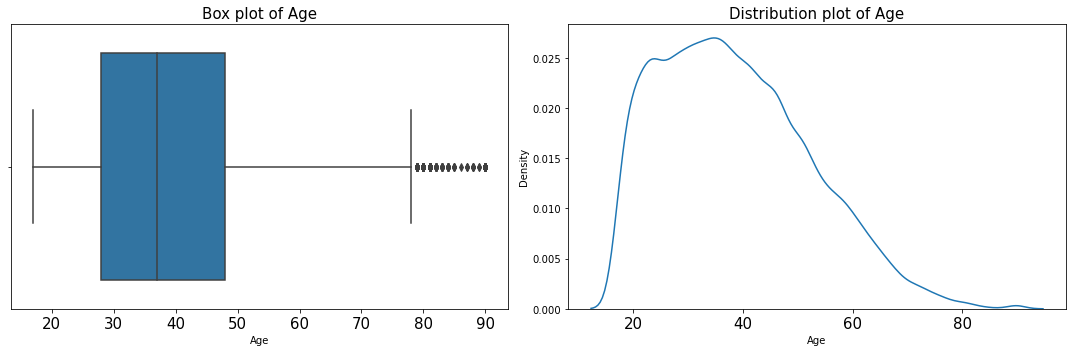

In [34]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = data, x = data['age'])
plt.title('Box plot of Age', fontsize = 15)
plt.xlabel('Age')
plt.xticks(fontsize=15)
plt.tight_layout()

plt.subplot(1,2,2)
sns.kdeplot(data = data, x = data['age'])
plt.title('Distribution plot of Age', fontsize = 15)
plt.xlabel('Age')
plt.xticks(fontsize=15)
plt.tight_layout()
plt.show()

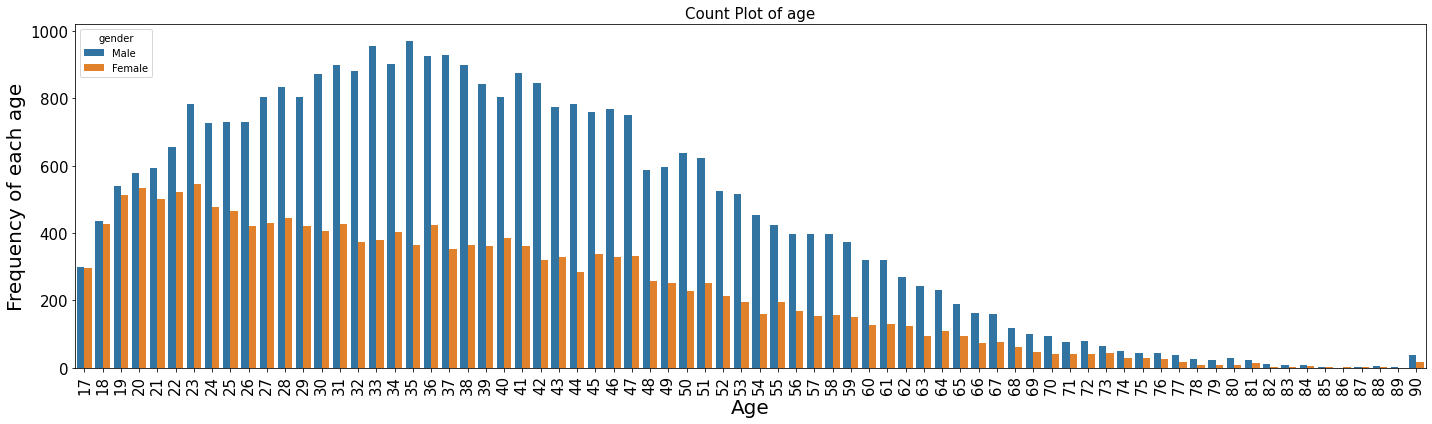

In [35]:
### lineplot with age and frequency of each age

plt.figure(figsize = (20,6))
sns.countplot(data = data, x = data['age'], hue = data['gender'])
plt.xlabel('Age',fontsize = 20)
plt.ylabel('Frequency of each age',fontsize = 20)
plt.title('Count Plot of age',fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

#### Observations from Age column
1. There are  more male people working than female people.
2. For the Range 23 to 67 years, proportion of male is double than that of female.

### Analysis on Work class

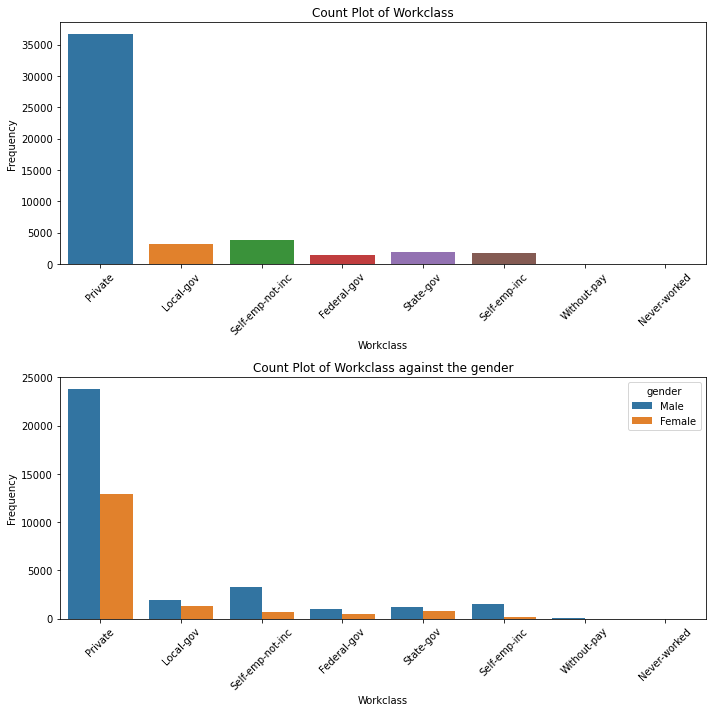

In [36]:
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
sns.countplot(data = data, x = data['workclass'])
plt.xlabel('Workclass')
plt.ylabel('Frequency')
plt.title('Count Plot of Workclass')
plt.xticks(rotation=45)

plt.subplot(2,1,2)
sns.countplot(data = data, x = data['workclass'], hue = data['gender'] )
plt.xlabel('Workclass')
plt.ylabel('Frequency')
plt.title('Count Plot of Workclass against the gender')
plt.xticks(rotation=45)
plt.tight_layout()

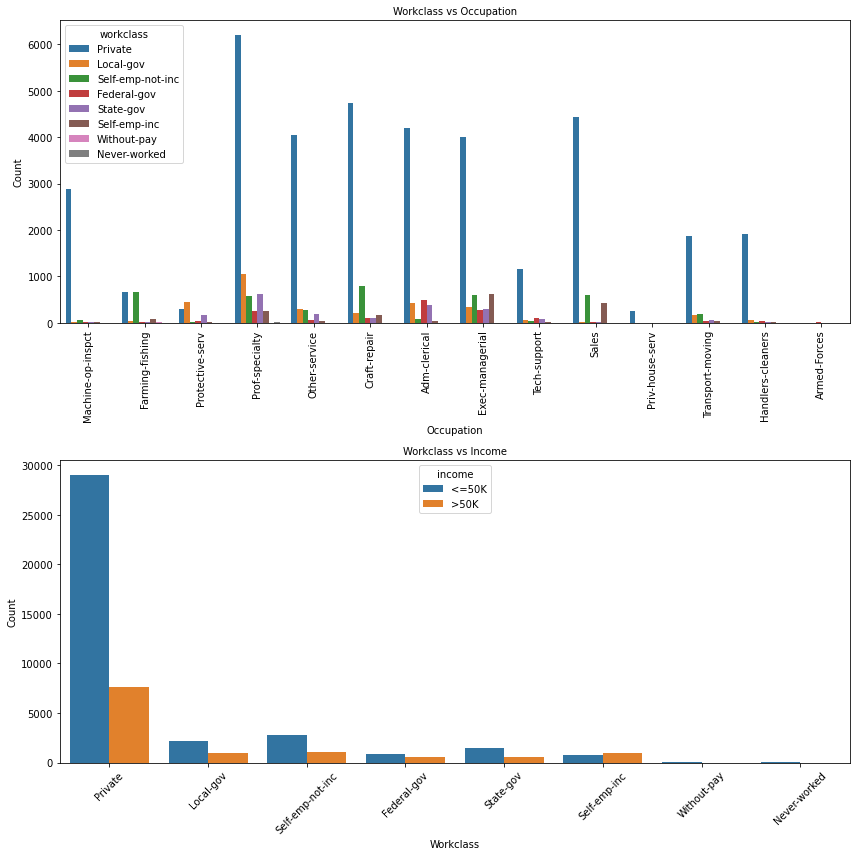

In [37]:
plt.figure(figsize = (12,12))
plt.subplot(2,1,1)
sns.countplot(data = data, x = 'occupation', hue = 'workclass')
plt.title('Workclass vs Occupation', fontsize = 10)
plt.xlabel('Occupation', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks( fontsize = 10)
plt.tight_layout()

plt.subplot(2,1,2)
sns.countplot(data = data, x = 'workclass', hue = 'income')
plt.title('Workclass vs Income', fontsize = 10)
plt.xlabel('Workclass', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks( fontsize = 10)
plt.tight_layout()


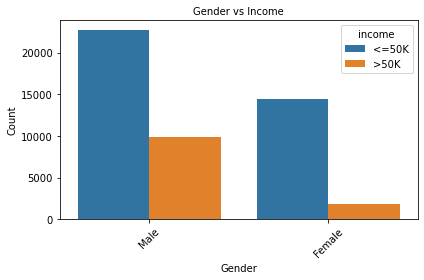

In [38]:
sns.countplot(data = data, x = 'gender', hue = 'income')
plt.title('Gender vs Income', fontsize = 10)
plt.xlabel('Gender', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks( fontsize = 10)
plt.tight_layout()

In [39]:
a = data.pivot_table('age', index = ['workclass'], columns = ['gender'], aggfunc = ['count'])
a.columns = a.columns.map('_'.join).str.strip('|')

In [40]:
a = a.fillna(0)

In [41]:
a['pop'] = a['count_Female'] + a['count_Male']

In [42]:
a['%male'] = (a['count_Male']/a['pop'])*100
a['%female'] = (a['count_Female']/a['pop'])*100

In [43]:
b = a[['%male', '%female']]

In [44]:
b

,%male,%female
workclass,,
Federal-gov,68.435754,31.564246
Local-gov,59.885204,40.114796
Never-worked,70.000000,30.000000
Private,64.939382,35.060618
Self-emp-inc,87.551622,12.448378
Self-emp-not-inc,83.713102,16.286898
State-gov,61.484099,38.515901
Without-pay,66.666667,33.333333


In [45]:
#b = b.drop(['?'])

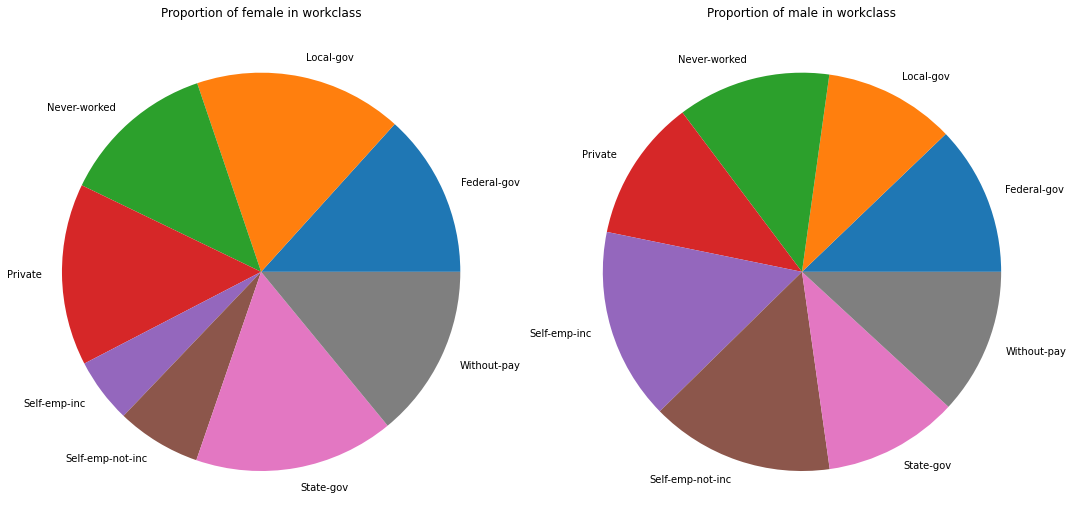

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
plt.subplot(1,2,1)
plt.pie(b['%female'], labels = b.index.to_list())
plt.title('Proportion of female in workclass')
plt.tight_layout()

plt.subplot(1,2,2)
plt.pie(b['%male'], labels = b.index.to_list())
plt.title('Proportion of male in workclass')
plt.tight_layout()

plt.show()

#### Observations on work class
1. There are maximum no.of people working in the private workclass followed by self employed income
2. When we look at gender perspective we find that in all the work classes population of male is more than pop of female
3. The population of female is highest in private workclass followed by local gov workclass
4.  When we look at the workclass vs occupation, 
     1. we find that many private workclass are employeed in protective service, prof-speciality
     other services, craft-repair, adm clerical, tech-support, priv-house service, transport moving occupation.
     2. The local gov workclass are maximum in prof=speciality followed by protective service.
5. When we look at workclass and income, we find that most of the private workclass make <50k income given the popoulation of 
    private workclass is more.
6. When we look at Gender vs income, we find that more number of male are making more in both income levels (<=50k and >50k)
7. From the pie chart of both male and female we find that there are more male in the workclass of self employed inc than
    that of the female

b = data.pivot_table('age' ,index = ['occupation'], columns = ['gender','income'], aggfunc = ['count'])

b.columns = b.columns.map('_'.join).str.strip('|')
#### b.columns.map('_'.join).str.strip('|') this function is used to merge the multi level columns into one level columns

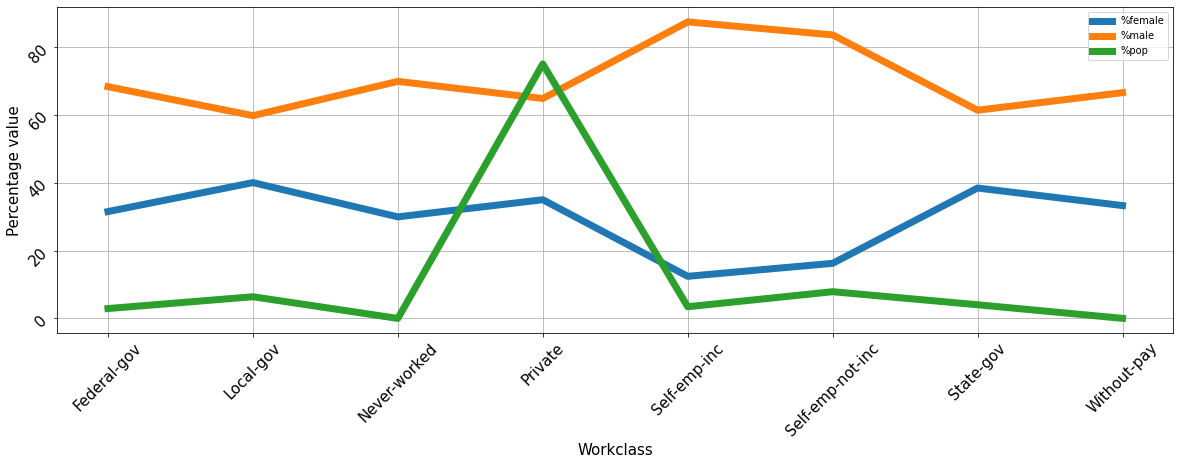

In [47]:
### making pivot table for workclass against gender
workclass_df = data.pivot_table('age' ,index = ['workclass'], columns = ['gender'], aggfunc = ['count'])
workclass_df1 = workclass_df.droplevel(0, axis = 1)
workclass_df1 = workclass_df1.reset_index()
workclass_df1['Total_pop'] = workclass_df1['Female'] + workclass_df1['Male']
workclass_df1['%female'] = (workclass_df1['Female']/workclass_df1['Total_pop'])*100
workclass_df1['%male'] = (workclass_df1['Male']/workclass_df1['Total_pop'])*100
workclass_df1['%pop'] = (workclass_df1['Total_pop']/workclass_df1['Total_pop'].sum())*100
workclass_df1

#Column description - %female = percentage of female pop wrt to total pop under each workclass eg, under federal-gov
#                    - %male = percentage of male pop wrt to total pop under each workclass eg, under federal-gov
#                    - Total_pop = sum of male and female under each workclass

plt.figure(figsize = (20,6))
sns.lineplot(data = workclass_df1, x = 'workclass', y = '%female',lw=7) # lw is used to make lines thick in line plot
sns.lineplot(data = workclass_df1, x = 'workclass', y = '%male',lw=7)
sns.lineplot(data = workclass_df1, x = 'workclass', y = '%pop',lw=7)
plt.xticks(rotation=45, fontsize = 15)
plt.yticks(rotation=45, fontsize = 15)
plt.xlabel('Workclass',fontsize = 15)
plt.ylabel('Percentage value',fontsize = 15)
plt.legend(['%female', '%male', '%pop'])
plt.grid()

### Analysis on Education

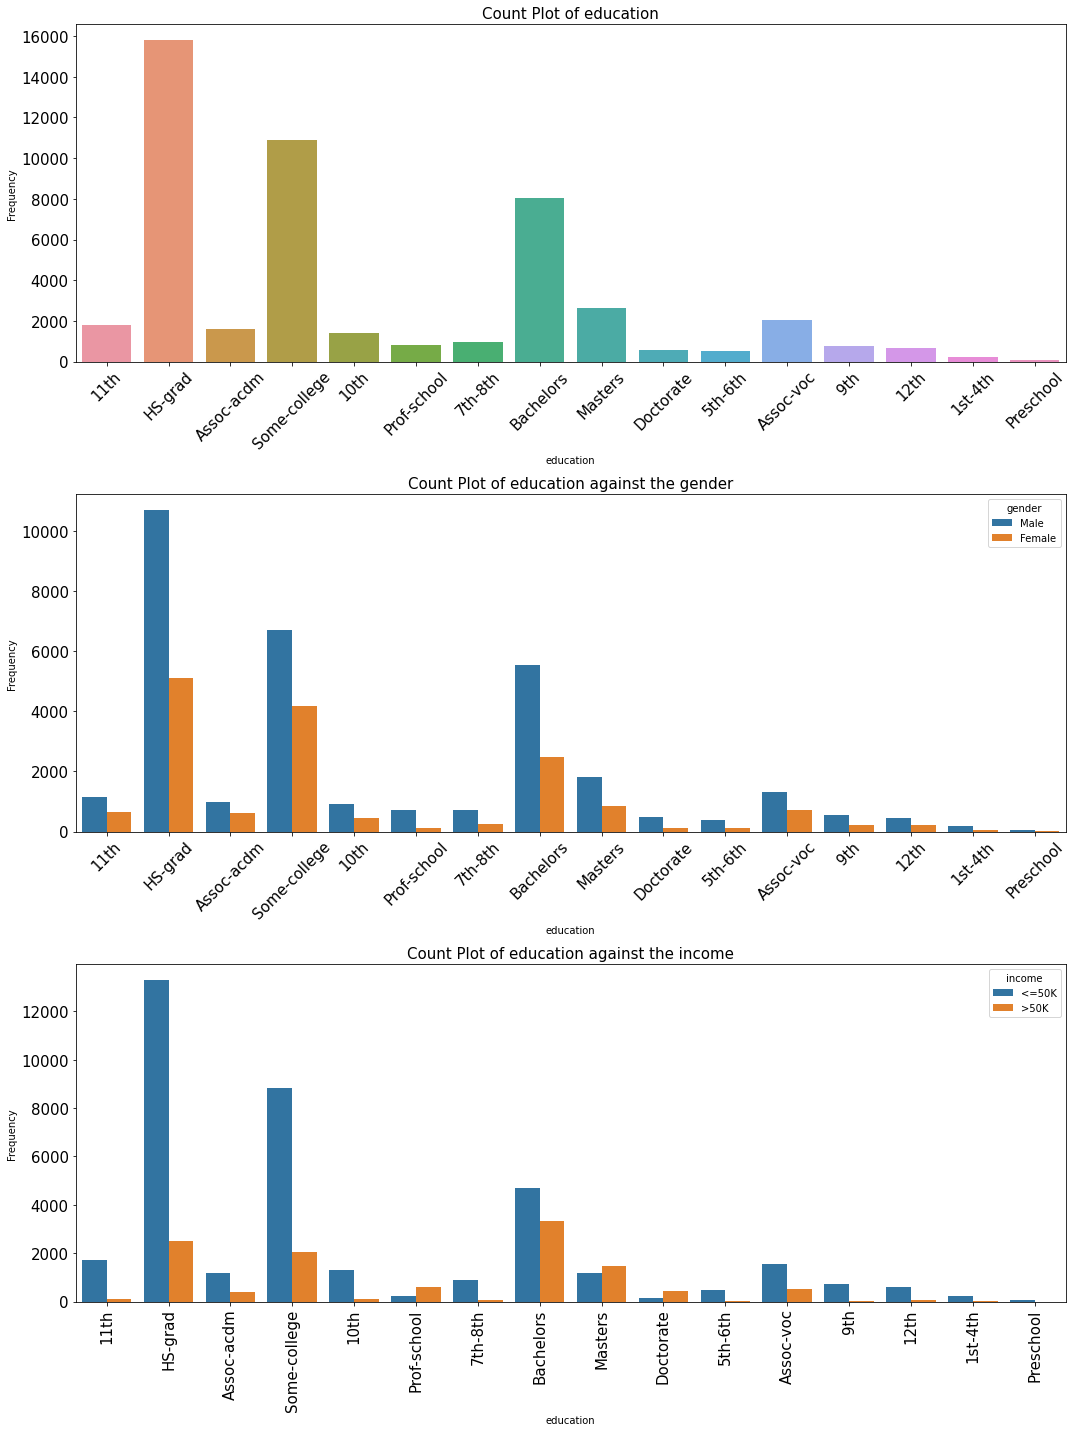

In [48]:
## Education is the categorical variable
plt.figure(figsize = (15,20))
plt.subplot(3,1,1)
sns.countplot(data = data, x = data['education'])
plt.xlabel('education')
plt.ylabel('Frequency')
plt.title('Count Plot of education', fontsize = 15)
plt.xticks(rotation=45)
plt.xticks(fontsize=15) ## font size change
plt.yticks(fontsize=15)
plt.tight_layout()

plt.subplot(3,1,2)
sns.countplot(data = data, x = data['education'], hue = data['gender'] )
plt.xlabel('education')
plt.ylabel('Frequency')
plt.title('Count Plot of education against the gender', fontsize = 15)
plt.xticks(rotation=45)
plt.xticks(fontsize=15) ## font size change
plt.yticks(fontsize=15)
plt.tight_layout()

plt.subplot(3,1,3)
sns.countplot(data = data, x = data['education'], hue = data['income'] )
plt.xlabel('education')
plt.ylabel('Frequency')
plt.title('Count Plot of education against the income', fontsize = 15)
plt.xticks(rotation=90)
plt.xticks(fontsize=15) ## font size change
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()


#### Observation on Education
1. Maximum number of poeple have completed the high school followed by some college and graduation.
2. The highest number of male and female also have the education in high school followed by some college and graduation.
3. The highest number of people making >50k have completed the Graduation followed by Hs Grad and lowest 
    number of people making >50k are those who fall under (1 to 12th class)
4. The highest number of people making <50k have education level as high graduate and some-college.

In [49]:
###Using group by we can achieve the results of pivot table

# x = pd.DataFrame(data.groupby(['education','gender'])[['gender']].count().unstack())
# print('with unstack\n', x)
# print('\n')
# y = pd.DataFrame(data.groupby(['education','gender'])[['gender']].count())
# print('without unstack\n', y)

#### Creating pivot table

In [50]:
### Creating pivot table for education wrt to gender
# index means rows. we want education in rows
# columns means gender column values. we want gender values male and female to be in columns
# we want count of population under each gender against the education. so we cannot use education or gender in values parameter
# (age is values parameter.) so we used age or any other varibale to be used as count
# link = https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
# link = https://www.machinelearningplus.com/pandas/pandas-pivot-table-in-python/
pivot = data.pivot_table('age', index = ['education'], columns = ['gender'], aggfunc = ['count'], margins = True,
                             margins_name='Grand Total' )
pivot

# the pivot table obtained in this style can also be optained by using following
# x = pd.DataFrame(data.groupby(['education','gender'])[['gender']].count().unstack())
# x
# groupby(['education','gender']) does the group by 
# operation and [['gender']] selects the gender
# output will be same as pivot_edu except for grand total 

# droping the count index present in column
pivot1 = pivot.droplevel(0, axis = 1)
pivot1

# let us drop education from being index
pivot2 = pivot1.reset_index()

In [51]:
print('index are',pivot2.index)
print('columns are',pivot2.columns)

index are RangeIndex(start=0, stop=17, step=1)
columns are Index(['education', 'Female', 'Male', 'Grand Total'], dtype='object', name='gender')


In [52]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


### Analysis on Occupation

In [53]:
## Pivot table
y = data.pivot_table('age', index = ['occupation'], columns = ['gender', 'income'], aggfunc = ['count'], fill_value= 0)
y.columns = y.columns.map('_'.join).str.strip('|')
y

,count_Female_<=50K,count_Female_>50K,count_Male_<=50K,count_Male_>50K
occupation,,,,
Adm-clerical,3460,309,1383,459
Armed-Forces,0,0,10,5
Craft-repair,290,33,4439,1350
Exec-managerial,1327,421,1851,2487
Farming-fishing,92,3,1225,170
Handlers-cleaners,246,8,1688,130
Machine-op-inspct,776,28,1874,344
Other-service,2620,78,2099,126
Priv-house-serv,225,3,14,0


#### Observation from pivot table of occupation, gender and income
1. Comparision between male and female in the income of <50k
    1. Highest number of female making <50k are in Adm-clerical occupation while highest number of male making <50k are in craft repir occupation
    2. It can be observed that population of male are more than female in the occupations that require a lot of 
        physical hardship like craft-repair, farming, handlers & cleaners, machine operators,protective services, transport moving
    3. For the jobs that are more of a office work jobs have good amount of gender balance in the population.
    4. Private house service has more female working than male.
2. Comparision between male and female in the income of >50k
    1. There are more male population making >50k than female population.
    2. The highest number of male making >50k are in Exec-managerial followed by Prof-specialty while the lowest are in armed forcecs
    3. The highest number of female making >50k are in  Prof-specialty followed by Exec-managerial while the lowest are in Farming-fishing

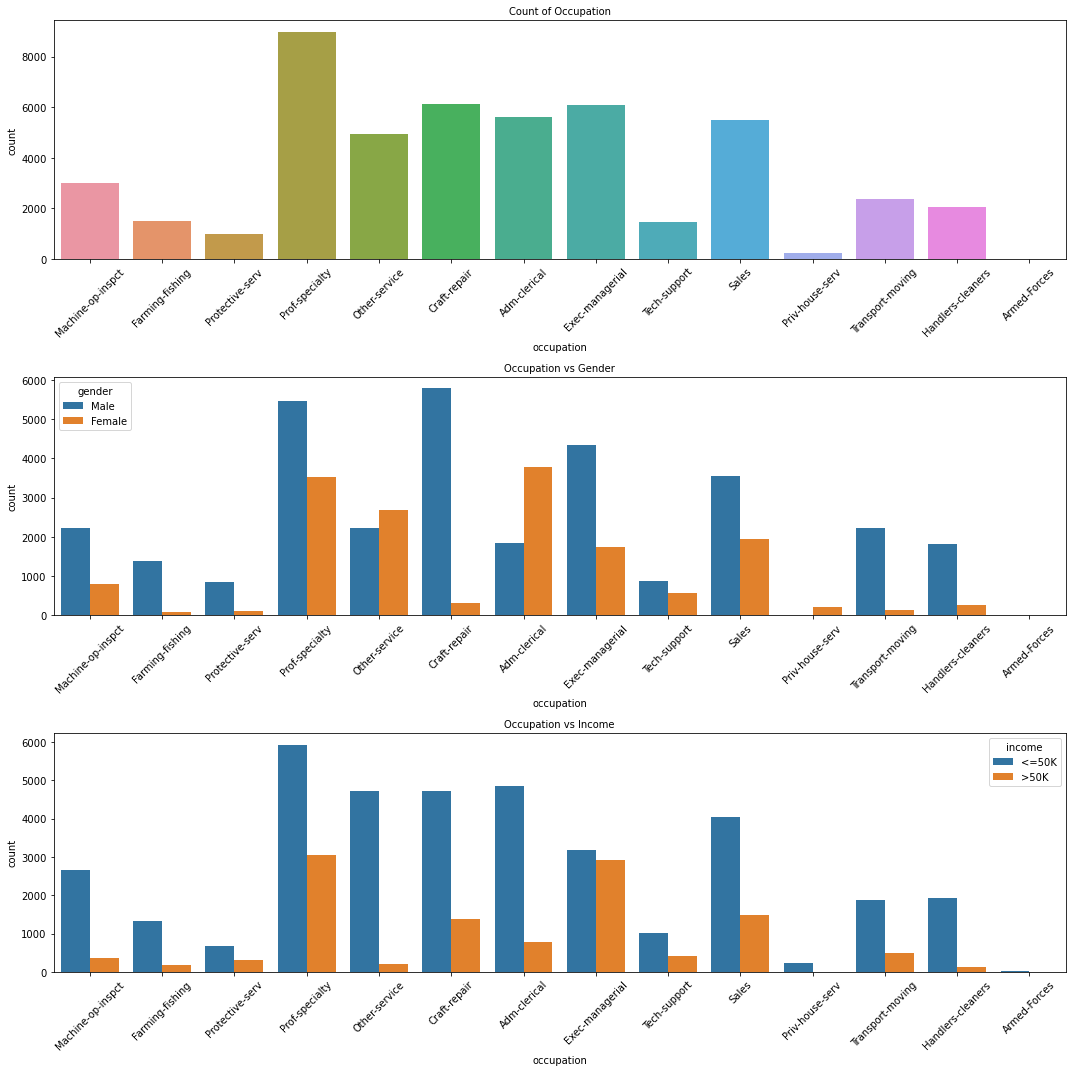

In [54]:
plt.figure(figsize = (15,15))

plt.subplot(3,1,1)
sns.countplot(data = data, x = 'occupation')
plt.xticks(fontsize=10)
plt.xticks(rotation = 45)
plt.title('Count of Occupation', fontsize = 10)
plt.tight_layout()

plt.subplot(3,1,2)
sns.countplot(data = data, x = 'occupation', hue = 'gender')
plt.xticks(fontsize=10)
plt.xticks(rotation = 45)
plt.title('Occupation vs Gender', fontsize = 10)
plt.tight_layout()

plt.subplot(3,1,3)
sns.countplot(data = data, x = 'occupation', hue = 'income')
plt.xticks(fontsize=10)
plt.xticks(rotation = 45)
plt.title('Occupation vs Income', fontsize = 10)
plt.tight_layout()

plt.show()

#### Observation on occupation
1. Prof-speciality has the highest number of people followed by craft repair and lowest in armed foreces.
2. Craft-repair has the highest number of male followed by prof-speciality and lowest in armed forces.
3. Admin-clerical has the highest number of female followed by prof-speciality
4. The highest number of people making <50k are in prof-speciality followed by other service, craft repair, admin clerical while 
    the lowest in armed forces.
5. The highest number of people making >50k are in prof-speciality followed by exec-managerical while lowest in 
    farming-fishing.
6. Prof-speciality and exec-managerial are occuapition with income >50k

In [55]:
c = data.pivot_table('age', index = ['occupation'], columns = ['workclass'], aggfunc = ['count'],fill_value= 0)
c.columns = c.columns.map('_'.join).str.strip('|')
c

,count_Federal-gov,count_Local-gov,count_Never-worked,count_Private,count_Self-emp-inc,count_Self-emp-not-inc,count_State-gov,count_Without-pay
occupation,,,,,,,,
Adm-clerical,487,421,0,4208,47,70,375,3
Armed-Forces,15,0,0,0,0,0,0,0
Craft-repair,93,211,0,4748,167,798,94,1
Exec-managerial,268,331,0,3995,617,587,287,1
Farming-fishing,9,43,0,670,82,653,25,8
Handlers-cleaners,36,65,0,1923,6,21,19,2
Machine-op-inspct,19,24,0,2882,17,59,19,2
Other-service,55,300,0,4057,42,276,191,2
Priv-house-serv,0,0,0,242,0,0,0,0


In [56]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


### Analysis on Relationship

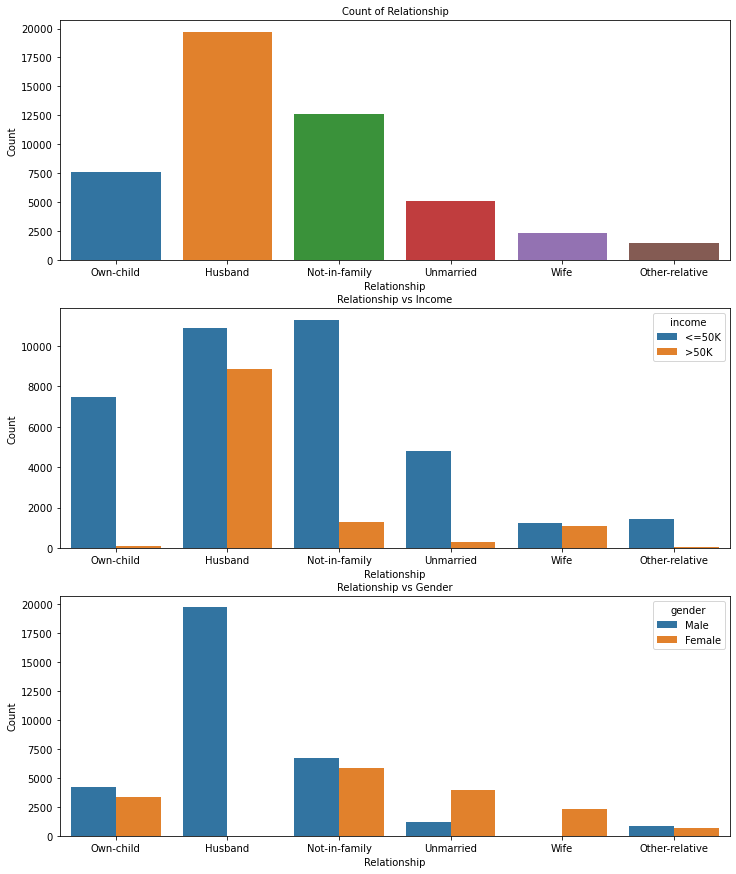

In [57]:
### Analysis on Relationship
plt.figure(figsize = (12,15))
plt.subplot(3,1,1)
sns.countplot(data = data, x = 'relationship')
plt.title('Count of Relationship', fontsize = 10)
plt.xlabel('Relationship')
plt.ylabel('Count')

plt.subplot(3,1,2)
sns.countplot(data = data, x = 'relationship', hue = 'income')
plt.title('Relationship vs Income', fontsize = 10)
plt.xlabel('Relationship')
plt.ylabel('Count')

plt.subplot(3,1,3)
sns.countplot(data = data, x = 'relationship', hue = 'gender')
plt.title('Relationship vs Gender', fontsize = 10)
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.show()

#### Observation from Relationship
1. There are more number of people under husband and not in family category (working outside the town) while few in other relative
2. Across the relationships, there are more people making <50k than people making >50k
3. It can be observed from Relationship vs gender graph that most of the male people working are husbands. 
4. There are more number of unmarried female working than unmarried male. 
5. It can be seen that both male and female not in family (working outside the town) are approximately equal in proportion.
6. After the husbands, both gender in not in family category are highest. 
7. The private work class has highest number of people working across all the relationships
8. Across all the occupation, husband are present more in number followed by not in family relationship.

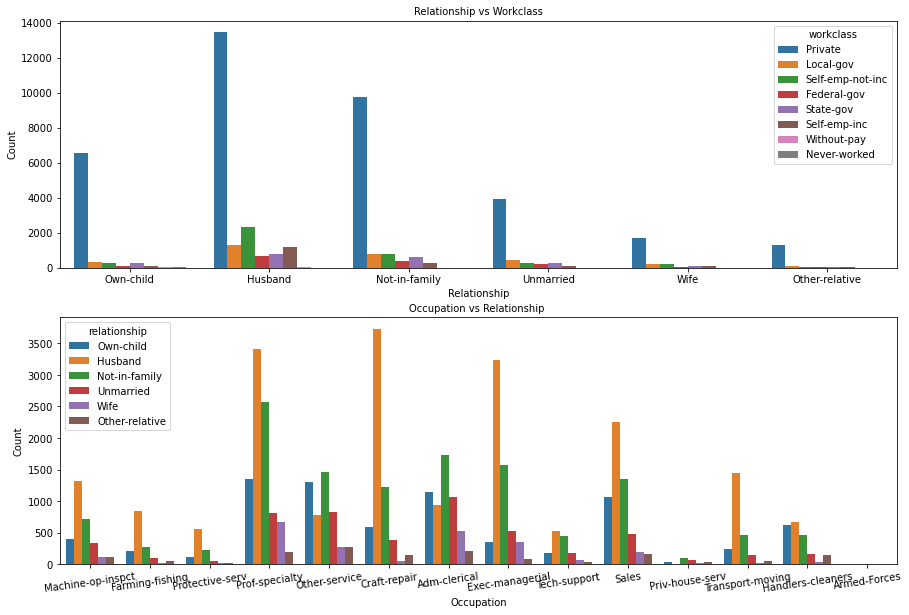

In [58]:
plt.figure(figsize = (15,10))
plt.subplot(2,1,1)
sns.countplot(data = data, x = 'relationship', hue = 'workclass')
plt.title('Relationship vs Workclass', fontsize = 10)
plt.xlabel('Relationship')
plt.xticks( fontsize = 10)
plt.ylabel('Count')

plt.subplot(2,1,2)
sns.countplot(data = data, x = 'occupation', hue = 'relationship')
plt.title('Occupation vs Relationship ', fontsize = 10)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation = 8, fontsize = 10)
plt.show()

In [59]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


### Analysis on Race

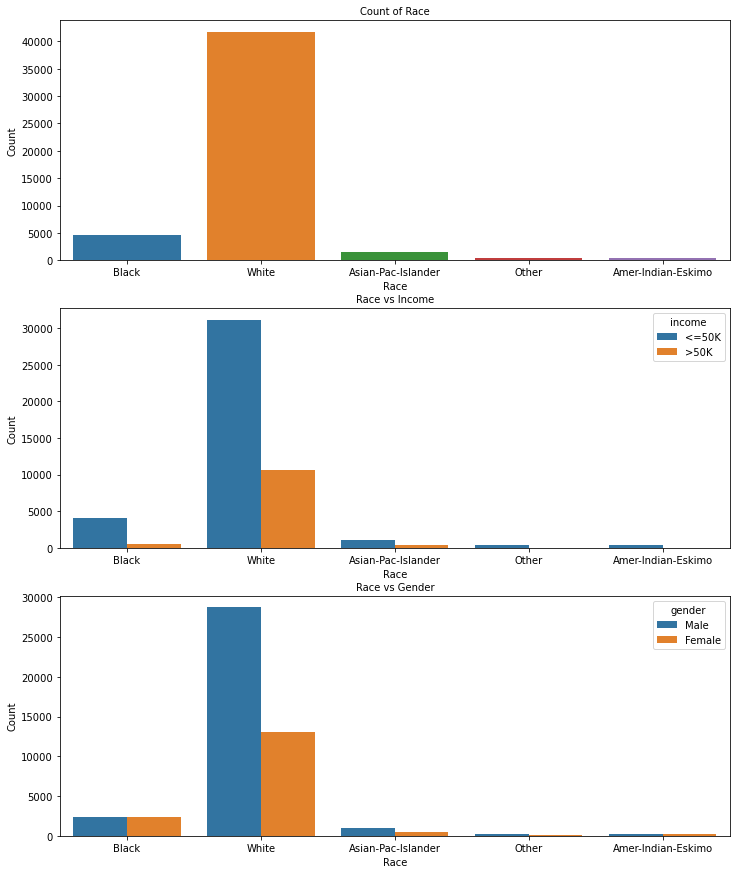

In [60]:
### Analysis on Relationship
plt.figure(figsize = (12,15))
plt.subplot(3,1,1)
sns.countplot(data = data, x = 'race')
plt.title('Count of Race', fontsize = 10)
plt.xlabel('Race')
plt.ylabel('Count')

plt.subplot(3,1,2)
sns.countplot(data = data, x = 'race', hue = 'income')
plt.title('Race vs Income', fontsize = 10)
plt.xlabel('Race')
plt.ylabel('Count')

plt.subplot(3,1,3)
sns.countplot(data = data, x = 'race', hue = 'gender')
plt.title('Race vs Gender', fontsize = 10)
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

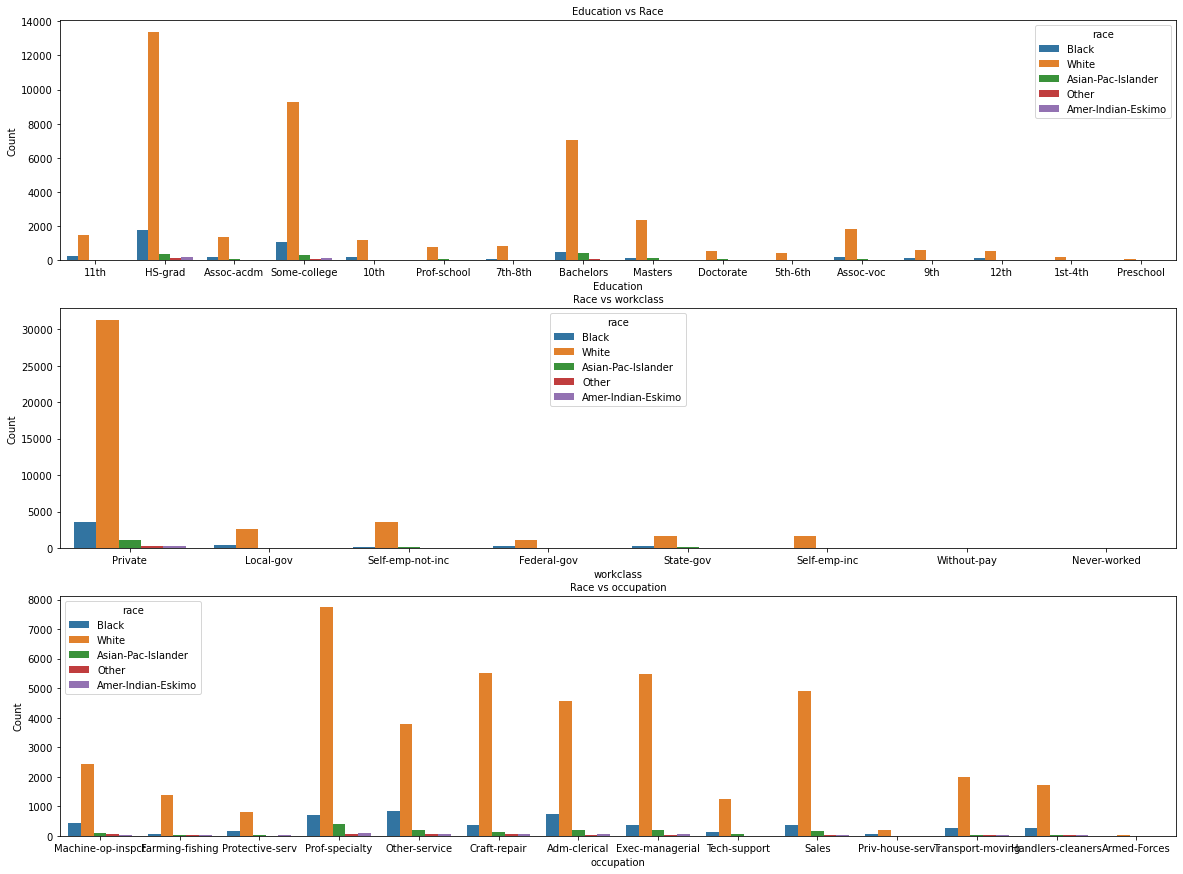

In [61]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.countplot(data = data, x = 'education', hue = 'race')
plt.title('Education vs Race', fontsize = 10)
plt.xlabel('Education')
plt.ylabel('Count')

plt.subplot(3,1,2)
sns.countplot(data = data, x = 'workclass', hue = 'race')
plt.title('Race vs workclass', fontsize = 10)
plt.xlabel('workclass')
plt.ylabel('Count')

plt.subplot(3,1,3)
sns.countplot(data = data, x = 'occupation', hue = 'race')
plt.title('Race vs occupation', fontsize = 10)
plt.xlabel('occupation')
plt.ylabel('Count')
plt.show()

#### Observation on Race
1. The population of white people are highest followed by blacks.
2. As the population of white is highest, they are in dominating population in each occupation, education and workclass.

In [62]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


### Analysis on Hours per week

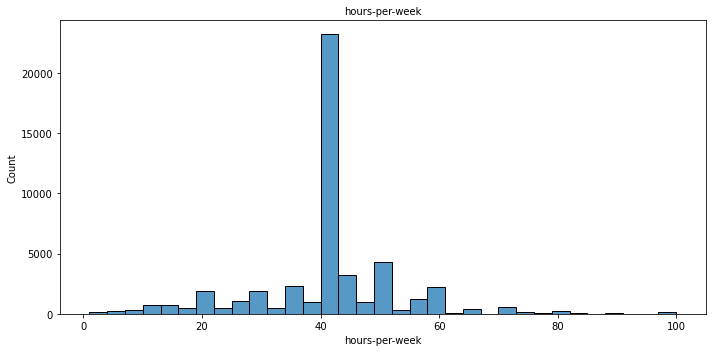

In [63]:
plt.figure(figsize = (10,5))
#plt.subplot(6,1,1)
sns.histplot(data = data, x = 'hours-per-week', binwidth=3)
plt.title('hours-per-week', fontsize = 10)
plt.xlabel('hours-per-week')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [64]:
df = pd.DataFrame(data['hours-per-week'].value_counts())
df = df.reset_index()
df = df.rename(columns = {'index':'Hours/week', 'hours-per-week': 'Freq'}) # rename the columns
df.sort_values(by=['Hours/week'])

,Hours/week,Freq
59,1,27
46,2,53
43,3,59
36,4,84
34,5,95
...,...,...
90,95,2
75,96,9
89,97,2
72,98,14


In [65]:
data[data['hours-per-week'] <= 10]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
22,72,Private,132015,7th-8th,4,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,6,United-States,<=50K
86,20,Federal-gov,244689,11th,7,Never-married,Other-service,Own-child,White,Female,0,0,10,United-States,<=50K
89,41,Private,38434,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,7688,0,10,United-States,>50K
92,33,Private,176410,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,5178,0,10,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48622,74,Self-emp-not-inc,199136,Bachelors,13,Widowed,Craft-repair,Not-in-family,White,Male,15831,0,8,Germany,>50K
48740,85,Private,98611,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,<=50K
48775,82,Private,403910,HS-grad,9,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,3,United-States,<=50K
48806,81,Private,120478,Assoc-voc,11,Divorced,Prof-specialty,Unmarried,White,Female,0,0,1,Prof-specialty,<=50K


#### Creating bins ie dividing the hours into range
    1.we have values in hours-per-week from 1 hr to 99
    2.let us divide the bins into 3 parts
    3.link = https://www.geeksforgeeks.org/how-to-use-pandas-cut-and-qcut/
    4. A bracket - [ or ] - means that end of the range is inclusive -- it includes the element listed.
        A parenthesis - ( or ) - means that end is exclusive and doesn't contain the listed element.
        So for [first1, last1) , the range starts with first1 (and includes it), but ends just before last1 

In [66]:
# right = false means that we get square bracket on leftside [)
# right = true means that we get square bracket on rightside (]
# square bracket means that number is included
# curve braket means that number is not included

data['Hour_range'] = pd.cut(x = data['hours-per-week'], bins=3, right=False)


In [67]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Hour_range
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,"[33.667, 66.333)"
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,"[33.667, 66.333)"
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,"[33.667, 66.333)"
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,"[33.667, 66.333)"
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K,"[1.0, 33.667)"


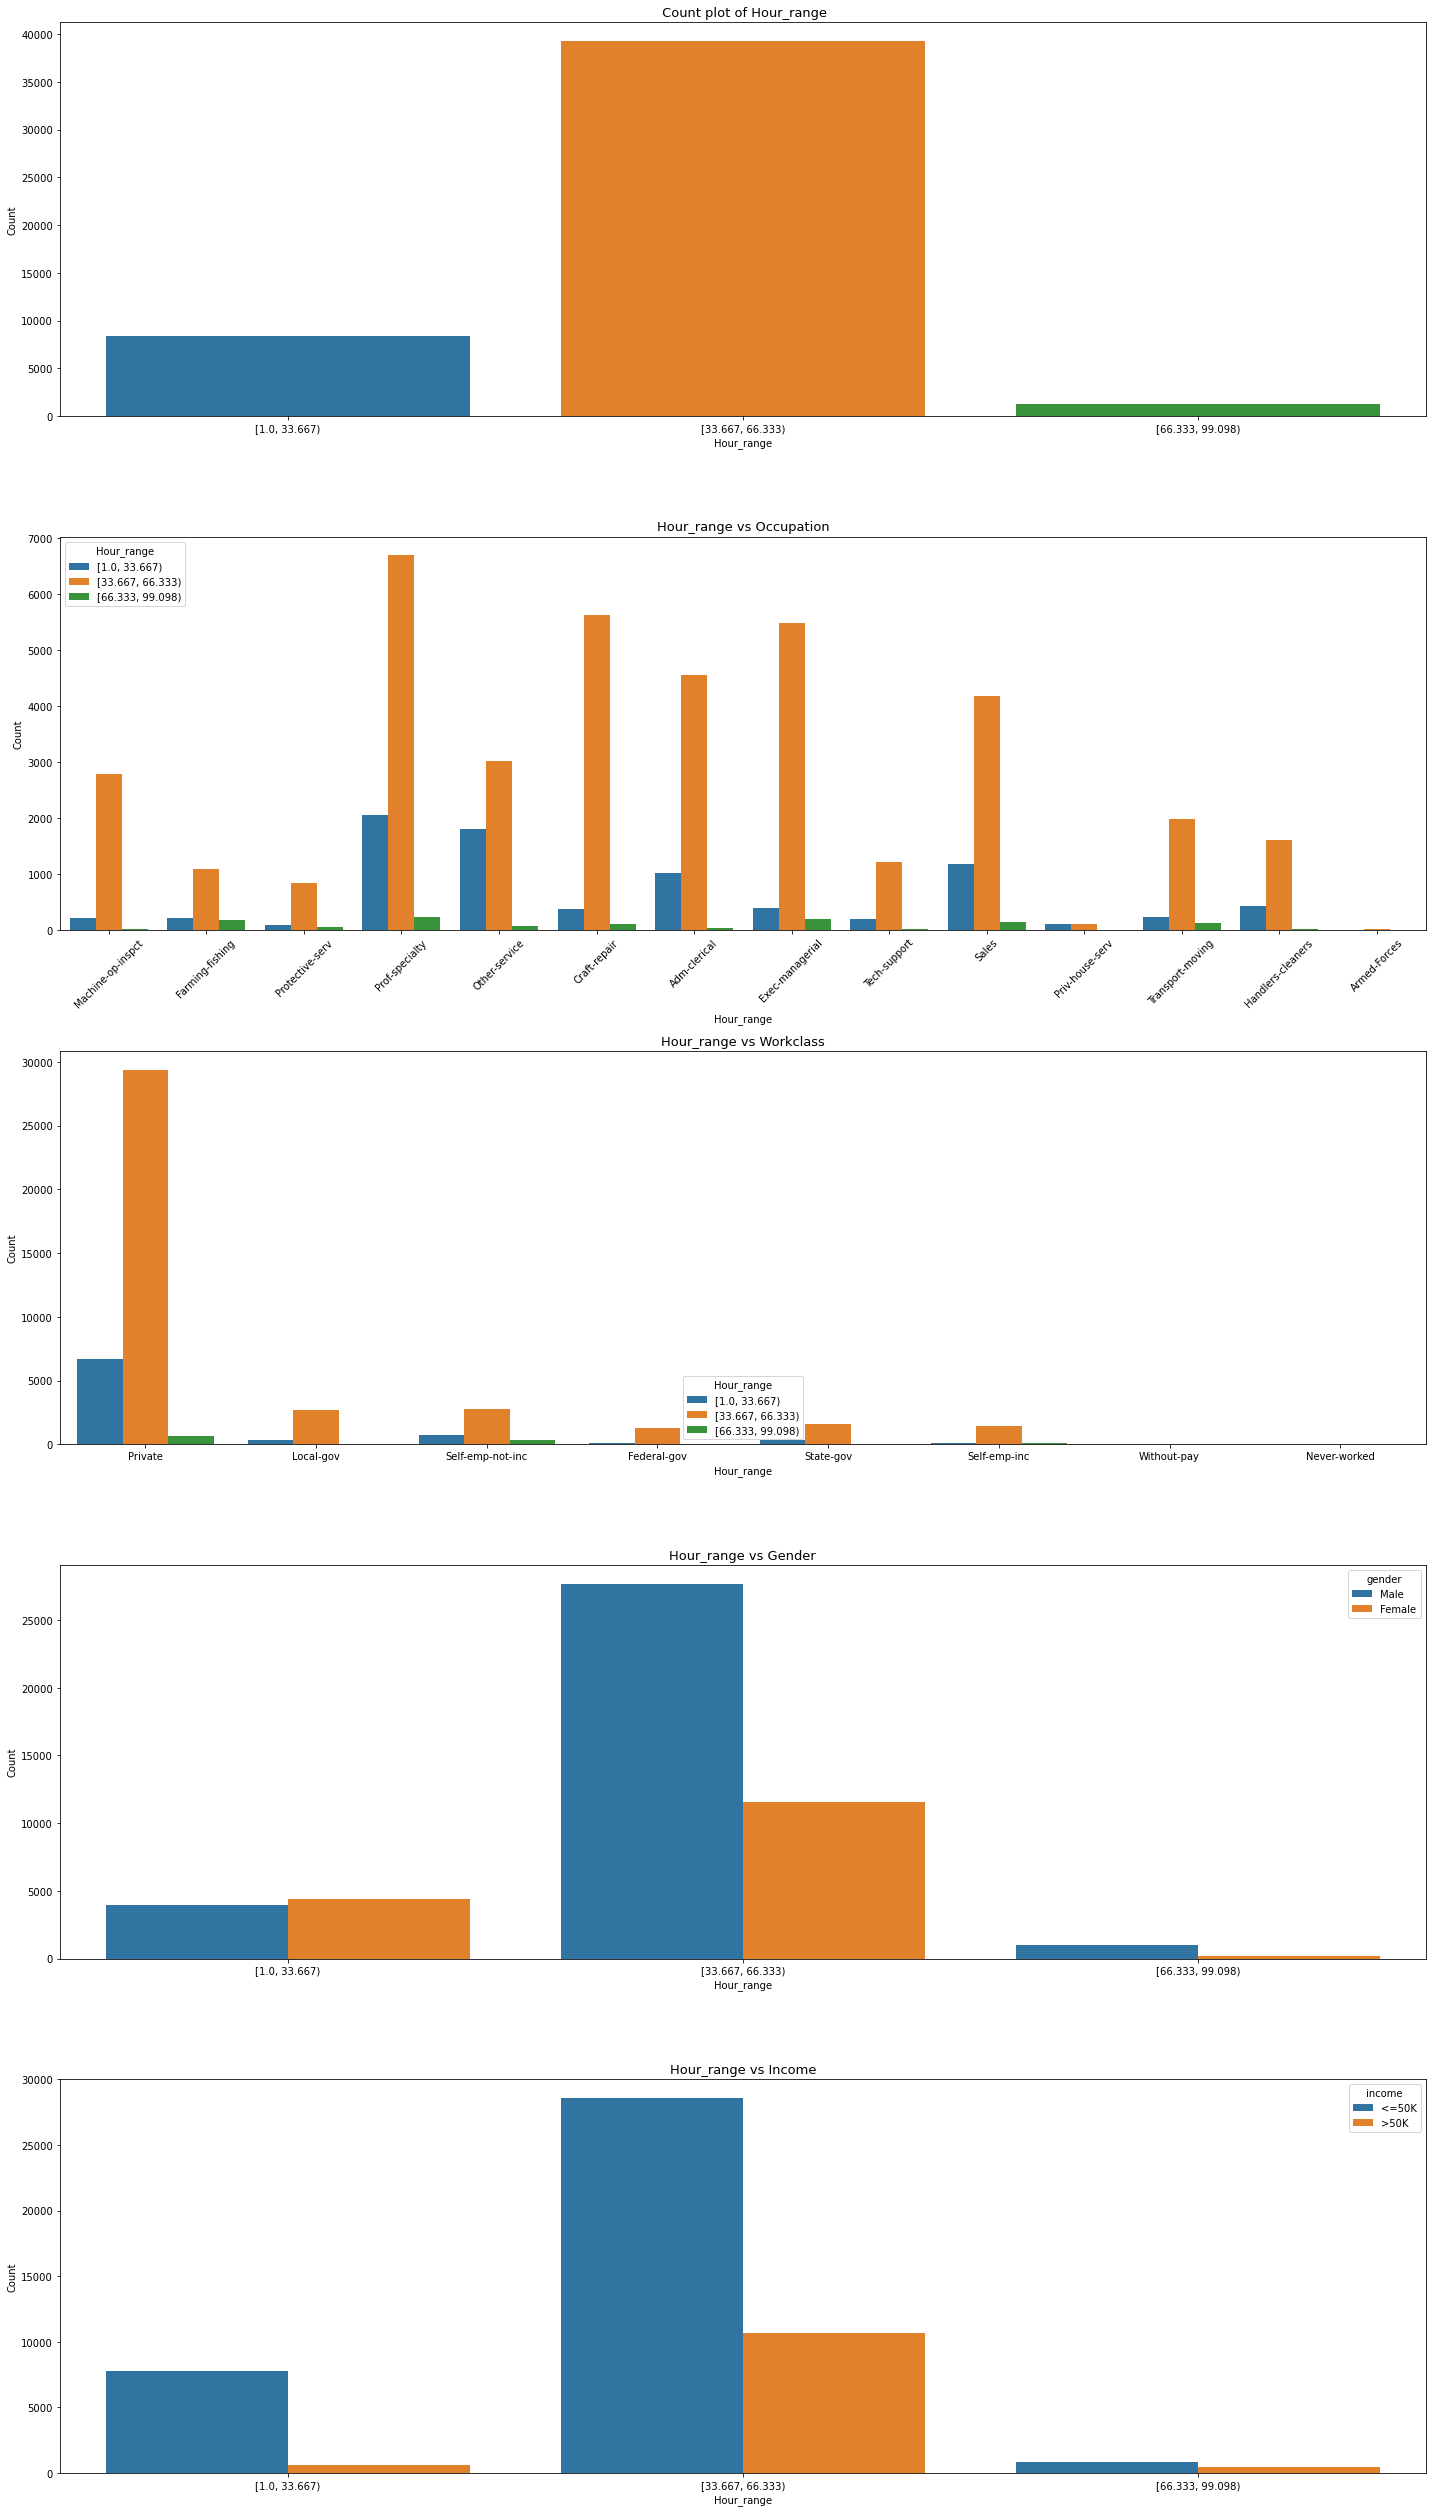

In [68]:
plt.figure(figsize = (20,35))
plt.subplot(5,1,1)
sns.countplot(data = data, x = 'Hour_range')
plt.title(' Count plot of Hour_range', fontsize = 13)
plt.xlabel('Hour_range', fontsize = 10)
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(5,1,2)
sns.countplot(data = data, x = 'occupation', hue = 'Hour_range')
plt.title('Hour_range vs Occupation', fontsize = 13)
plt.xlabel('Hour_range', fontsize = 10)
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.tight_layout()

plt.subplot(5,1,3)
sns.countplot(data = data, x = 'workclass', hue = 'Hour_range')
plt.title('Hour_range vs Workclass', fontsize = 13)
plt.xlabel('Hour_range', fontsize = 10)
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(5,1,4)
sns.countplot(data = data, x = 'Hour_range', hue = 'gender')
plt.title('Hour_range vs Gender', fontsize = 13)
plt.xlabel('Hour_range', fontsize = 10)
plt.ylabel('Count')
plt.tight_layout()

plt.subplot(5,1,5)
sns.countplot(data = data, x = 'Hour_range', hue = 'income')
plt.title('Hour_range vs Income', fontsize = 13)
plt.xlabel('Hour_range', fontsize = 10)
plt.ylabel('Count')
plt.tight_layout()

plt.show()

#### Observation on Working hour group
1. The count of hours group 33 to 66 hr per week has the highest frequency followed by 1 to 32 hrs
2. It is obvisious that the group 33 to 66 hr per week has more frequency than any other in occuaption but it is 
    interesting to observe that the group 1 to 33 hrs per week have many people in prof-speciality and other services.

### Analysis on Age group

In [69]:
data['Age_group'] = pd.cut(x = data['age'], bins=4, right=False)

In [70]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Hour_range,Age_group
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,"[33.667, 66.333)","[17.0, 35.25)"
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,"[33.667, 66.333)","[35.25, 53.5)"
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,"[33.667, 66.333)","[17.0, 35.25)"
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,"[33.667, 66.333)","[35.25, 53.5)"
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K,"[1.0, 33.667)","[17.0, 35.25)"


In [71]:
data['age'].nunique()

74

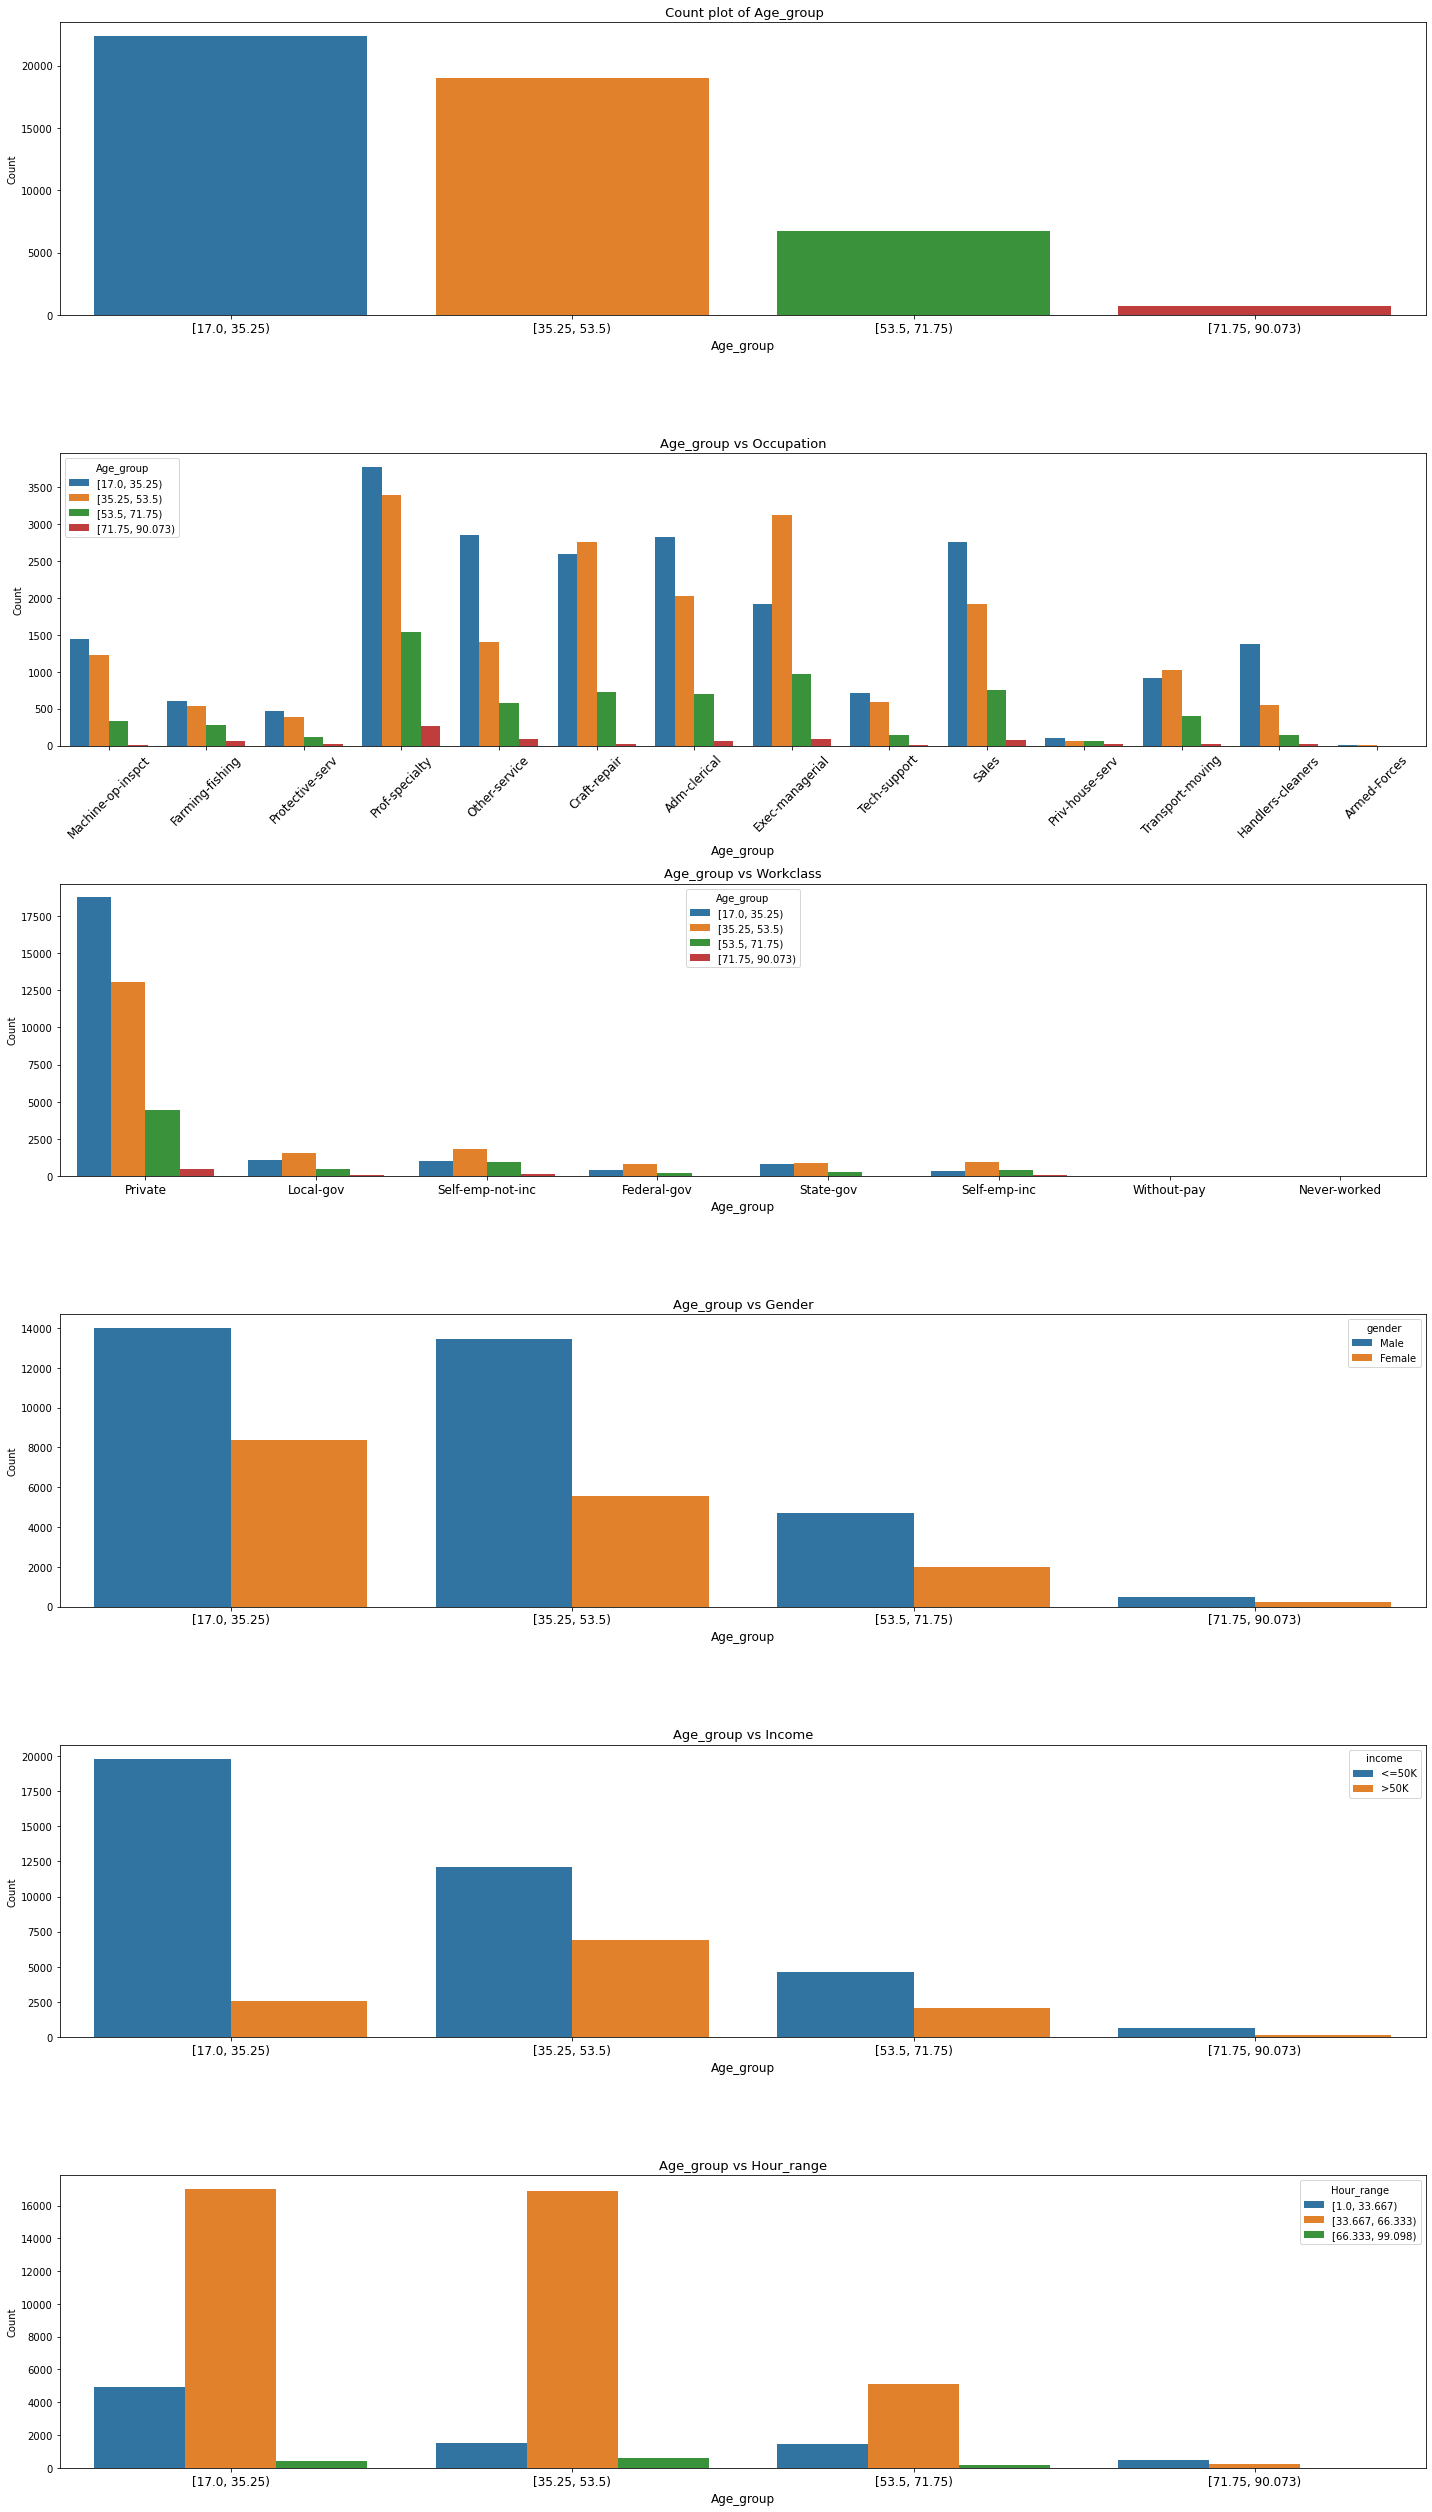

In [72]:
plt.figure(figsize = (20,35))
plt.subplot(6,1,1)
sns.countplot(data = data, x = 'Age_group')
plt.title(' Count plot of Age_group', fontsize = 13)
plt.xlabel('Age_group', fontsize = 12)
plt.ylabel('Count')
plt.xticks(fontsize = 12)
plt.tight_layout()

plt.subplot(6,1,2)
sns.countplot(data = data, x = 'occupation', hue = 'Age_group')
plt.title('Age_group vs Occupation', fontsize = 13)
plt.xlabel('Age_group', fontsize = 12)
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.xticks(fontsize = 12)
plt.tight_layout()

plt.subplot(6,1,3)
sns.countplot(data = data, x = 'workclass', hue = 'Age_group')
plt.title('Age_group vs Workclass', fontsize = 13)
plt.xlabel('Age_group', fontsize = 12)
plt.ylabel('Count')
plt.xticks(fontsize = 12)
plt.tight_layout()

plt.subplot(6,1,4)
sns.countplot(data = data, x = 'Age_group', hue = 'gender')
plt.title('Age_group vs Gender', fontsize = 13)
plt.xlabel('Age_group', fontsize = 12)
plt.ylabel('Count')
plt.xticks(fontsize = 12)
plt.tight_layout()

plt.subplot(6,1,5)
sns.countplot(data = data, x = 'Age_group', hue = 'income')
plt.title('Age_group vs Income', fontsize = 13)
plt.xlabel('Age_group', fontsize = 12)
plt.ylabel('Count')
plt.xticks(fontsize = 12)
plt.tight_layout()

plt.subplot(6,1,6)
sns.countplot(data = data, x = 'Age_group', hue = 'Hour_range')
plt.title('Age_group vs Hour_range', fontsize = 13)
plt.xlabel('Age_group', fontsize = 12)
plt.ylabel('Count')
plt.xticks(fontsize = 12)
plt.tight_layout()
plt.show()

#### Observation on Age group
1. There are more number of people in age group 17 to 35 followed by 35 to 53 years.
2. The popoulation of group 17 to 35 are present in more numbers in all occupation except for executive managerial and craft repair occupation.
    It can be observed that executive managerial and craft repair occupation requires more experienced people to handle the job.
3. The population of male is highest across each age group
4. The highest number of people making <50k are available in age group 17 to 35.
5. The highest number of people making >50k are available in age group 35 to 53
6. The population of working hours 33 to 66 is high in all age groups except for 71 to 90 age group. 

In [73]:
### Analysis on Income

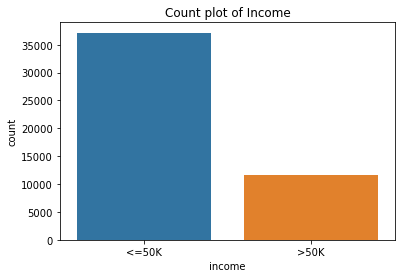

In [74]:
sns.countplot(data = data, x = 'income')
plt.title('Count plot of Income')
plt.show()

In [75]:
data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [76]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Hour_range,Age_group
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,"[33.667, 66.333)","[17.0, 35.25)"
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,"[33.667, 66.333)","[35.25, 53.5)"
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,"[33.667, 66.333)","[17.0, 35.25)"
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,"[33.667, 66.333)","[35.25, 53.5)"
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K,"[1.0, 33.667)","[17.0, 35.25)"


### Box Plot of Numeric variables

<AxesSubplot:xlabel='capital-loss'>

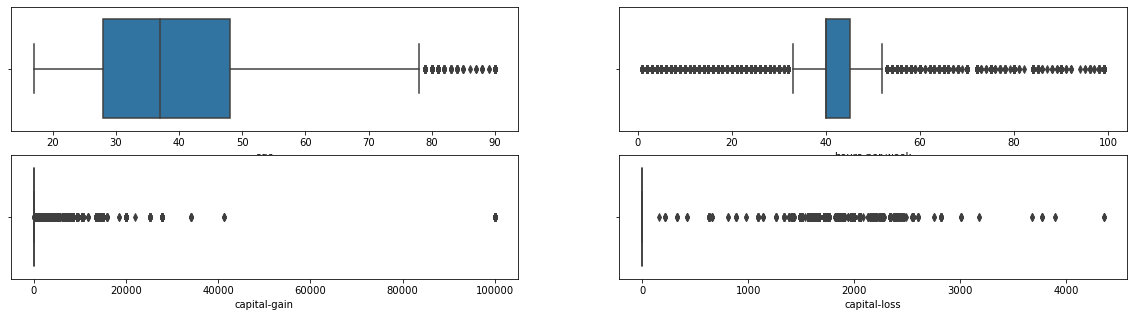

In [77]:
plt.figure(figsize = (20,5))
plt.subplot(2,2,1)
sns.boxplot(data = data, x = 'age')

plt.subplot(2,2,2)
sns.boxplot(data = data, x = 'hours-per-week')

plt.subplot(2,2,3)
sns.boxplot(data = data, x = 'capital-gain')

plt.subplot(2,2,4)
sns.boxplot(data = data, x = 'capital-loss')

16 = doctorate
15 = Prof-school
14 = Masters
13 = Bachelors
12 = Assoc-acdm
11 = Assoc-voc
10 = Some-college
9 = HS-grad
8 = 12th
7 = 11th
6 = 10th
5 = 9th
4 = 7th-8th
3 = 5th-6th
2 = 1st-4th
1 = Preschool


In [78]:
data['capital-gain'].value_counts()

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
1111         1
7262         1
22040        1
1639         1
2387         1
Name: capital-gain, Length: 123, dtype: int64

In [79]:
data['capital-loss'].value_counts()

0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
2465        1
2080        1
155         1
1911        1
2201        1
Name: capital-loss, Length: 99, dtype: int64

In [80]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [81]:
#data.isnull().sum()

### Outlier Treatment

In [82]:
# Detecting outliers in Age column

#### outlier treatment of age as the column age has many outlier values
df = data
df.describe()
# Finding the IQR
percentile25 = df['age'].quantile(0.25)
percentile75 = df['age'].quantile(0.75)

print('percentile75',percentile75)
print('percentile25',percentile25)

iqr = percentile75 - percentile25
print('iqr',iqr)

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)


percentile75 48.0
percentile25 28.0
iqr 20.0
Upper limit 78.0
Lower limit -2.0


In [83]:
#Finding Outliers that are above the upper_limit
df[df['age'] > upper_limit].shape
## there are 216 values of age that are above the upperlimit
df[df['age'] > upper_limit]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Hour_range,Age_group
193,79,Private,48574,7th-8th,4,Widowed,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K,"[33.667, 66.333)","[71.75, 90.073)"
234,80,Self-emp-not-inc,201092,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,30,United-States,<=50K,"[1.0, 33.667)","[71.75, 90.073)"
899,90,Private,149069,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,1825,50,United-States,>50K,"[33.667, 66.333)","[71.75, 90.073)"
926,79,Private,27457,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,23,United-States,<=50K,"[1.0, 33.667)","[71.75, 90.073)"
951,80,Private,138050,HS-grad,9,Married-spouse-absent,Machine-op-inspct,Not-in-family,White,Female,0,0,16,United-States,<=50K,"[1.0, 33.667)","[71.75, 90.073)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48558,90,Private,313749,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,<=50K,"[1.0, 33.667)","[71.75, 90.073)"
48648,90,Local-gov,214594,7th-8th,4,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,<=50K,"[33.667, 66.333)","[71.75, 90.073)"
48740,85,Private,98611,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,<=50K,"[1.0, 33.667)","[71.75, 90.073)"
48775,82,Private,403910,HS-grad,9,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,3,United-States,<=50K,"[1.0, 33.667)","[71.75, 90.073)"


In [84]:
#Finding Outliers that are below the lower_limit
df[df['age'] < lower_limit].shape
## there are no values of age that are below the lower limit
df[df['age'] < lower_limit]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Hour_range,Age_group


In [85]:
### Treating the outlier by replacing them with avg value. We are assuming the age to be continous variable

# finding median of age
mean = df.loc[df['age'] < upper_limit, 'age'].mean()
print('mean',mean)
median = df.loc[df['age'] < upper_limit, 'age'].median()
print('median',median)

mean 38.41595324333223
median 37.0


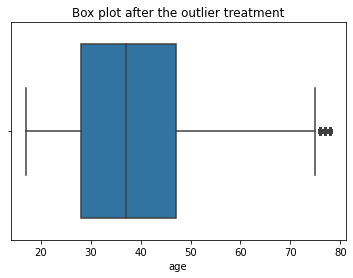

In [86]:
#Capping - in this method of treatment we replace the outliers with some value if true, if false we keep data as it is

df['age'] = np.where(
    df['age'] > upper_limit,
    mean,
    np.where(
        df['age'] < lower_limit,
        mean,
        df['age']
    )
)

df.describe()

sns.boxplot(data = df, x =df['age'])
plt.title('Box plot after the outlier treatment')
plt.show()

#### outlier treatment of age as the column age has many outlier values

In [87]:
# Detecting outliers in hours-per-week column

#### outlier treatment of age as the column age has many outlier values

# Finding the IQR
percentile25 = df['hours-per-week'].quantile(0.25)
percentile75 = df['hours-per-week'].quantile(0.75)

print('percentile75',percentile75)
print('percentile25',percentile25)

iqr = percentile75 - percentile25
print('iqr',iqr)

upper_limit_hours = percentile75 + 1.5 * iqr
lower_limit_hours = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit_hours)
print("Lower limit",lower_limit_hours)


percentile75 45.0
percentile25 40.0
iqr 5.0
Upper limit 52.5
Lower limit 32.5


In [88]:
#Finding Outliers that are above the upper_limit
df[df['hours-per-week'] > upper_limit_hours].shape
## there are 5210 values of hours-per-week that are above the upperlimit
df[df['hours-per-week'] > upper_limit_hours]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Hour_range,Age_group
25,45.0,Self-emp-not-inc,432824,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,90,United-States,>50K,"[66.333, 99.098)","[35.25, 53.5)"
27,23.0,Private,134446,HS-grad,9,Separated,Machine-op-inspct,Unmarried,Black,Male,0,0,54,United-States,<=50K,"[33.667, 66.333)","[17.0, 35.25)"
29,32.0,Self-emp-not-inc,109282,Some-college,10,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,60,United-States,<=50K,"[33.667, 66.333)","[17.0, 35.25)"
53,22.0,Private,54164,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,14084,0,60,United-States,>50K,"[33.667, 66.333)","[17.0, 35.25)"
54,38.0,Private,219446,9th,5,Married-spouse-absent,Exec-managerial,Not-in-family,White,Male,0,0,54,Mexico,<=50K,"[33.667, 66.333)","[35.25, 53.5)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35.0,Private,320084,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,55,United-States,>50K,"[33.667, 66.333)","[17.0, 35.25)"
48812,30.0,Private,33811,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K,"[66.333, 99.098)","[17.0, 35.25)"
48813,34.0,Private,204461,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,"[33.667, 66.333)","[17.0, 35.25)"
48817,34.0,Private,160216,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K,"[33.667, 66.333)","[17.0, 35.25)"


In [89]:
data.shape

(48842, 17)

In [90]:
#Finding Outliers that are below the lower_limit
df[df['hours-per-week'] < lower_limit_hours].shape
## there are 8286 values of hours-per-week that are below the lower limit
df[df['hours-per-week'] < lower_limit_hours]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Hour_range,Age_group
4,18.0,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K,"[1.0, 33.667)","[17.0, 35.25)"
5,34.0,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,"[1.0, 33.667)","[17.0, 35.25)"
7,63.0,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,"[1.0, 33.667)","[53.5, 71.75)"
9,55.0,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K,"[1.0, 33.667)","[53.5, 71.75)"
16,20.0,State-gov,444554,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,25,United-States,<=50K,"[1.0, 33.667)","[17.0, 35.25)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48823,72.0,Private,129912,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,25,United-States,<=50K,"[1.0, 33.667)","[71.75, 90.073)"
48825,31.0,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K,"[1.0, 33.667)","[17.0, 35.25)"
48826,39.0,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K,"[1.0, 33.667)","[35.25, 53.5)"
48834,32.0,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K,"[1.0, 33.667)","[17.0, 35.25)"


In [91]:
### Treating the outlier by replacing them with avg value. We are assuming the age to be continous variable

# finding median of hours-per-week
mean = df.loc[df['hours-per-week'] < upper_limit_hours, 'hours-per-week'].mean()
print('mean',mean)
median = df.loc[df['hours-per-week'] < upper_limit_hours, 'hours-per-week'].median()
print('median',median)

# There is a difference of 1.12 between mean value and median value. we can assume that hours-per-week is continuous variable.
# we can replace the outliers either with mean or median. we will go with mean.

mean 37.67079207920792
median 40.0


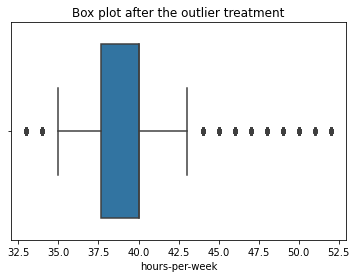

In [92]:
#Capping - in this method of treatment we replace the outliers with some value if true, if false we keep data as it is

df['hours-per-week'] = np.where(
    df['hours-per-week'] > upper_limit_hours,
    mean,
    np.where(
        df['hours-per-week'] < lower_limit_hours,
        mean,
        df['hours-per-week']
    )
)

df.describe()

sns.boxplot(data = df, x =df['hours-per-week'])
plt.title('Box plot after the outlier treatment')
plt.show()

#### outlier treatment of outlier as the column capital gain has many outlier values

In [93]:
#### outlier treatment of outlier as the column capital gain has many outlier values

# Finding the IQR
percentile25 = df['capital-gain'].quantile(0.25)
percentile75 = df['capital-gain'].quantile(0.75)

print('percentile75',percentile75)
print('percentile25',percentile25)

iqr = percentile75 - percentile25
print('iqr',iqr)

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

#Finding Outliers
df[df['capital-gain'] > upper_limit].shape
#Finding Outliers
df[df['capital-gain'] < lower_limit].shape

# finding median of age
mean = df.loc[df['capital-gain'] < upper_limit, 'capital-gain'].mean()
print('mean',mean)
median = df.loc[df['capital-gain'] < upper_limit, 'capital-gain'].median()
print('median',median)

# since the mean and median are 0, we will replace capital gain with 0

percentile75 0.0
percentile25 0.0
iqr 0.0
Upper limit 0.0
Lower limit 0.0
mean nan
median nan


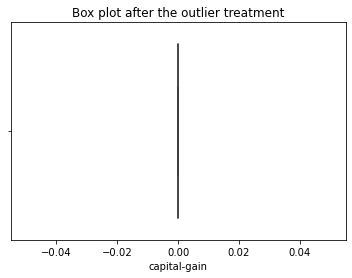

In [94]:
#Capping in this we replace the outliers with some value if true, if false we keep data as it is

df['capital-gain'] = np.where(
    df['capital-gain'] > upper_limit,
    0,
    np.where(
       df['capital-gain'] < lower_limit,
        0,
        df['capital-gain']
    )
)

df.describe()

sns.boxplot(data = df, x =df['capital-gain'])
plt.title('Box plot after the outlier treatment')
plt.show()


#### outlier treatment of outlier as the column capital loss has many outlier values

In [95]:
#### outlier treatment of outlier as the column capital loss has many outlier values

# Finding the IQR
percentile25 = df['capital-loss'].quantile(0.25)
percentile75 = df['capital-loss'].quantile(0.75)

print('percentile75',percentile75)
print('percentile25',percentile25)

iqr = percentile75 - percentile25
print('iqr',iqr)

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

#Finding Outliers
df[df['capital-gain'] > upper_limit].shape
#Finding Outliers
df[df['capital-gain'] < lower_limit].shape

# finding median of age
mean = df.loc[df['capital-loss'] < upper_limit, 'capital-loss'].mean()
print('mean',mean)
median = df.loc[df['capital-loss'] < upper_limit, 'capital-loss'].median()
print('median',median)

# since the mean and median are 0, we will replace capital gain with 0

percentile75 0.0
percentile25 0.0
iqr 0.0
Upper limit 0.0
Lower limit 0.0
mean nan
median nan


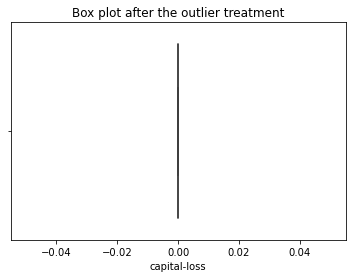

In [96]:
#Capping in this we replace the outliers with some value if true, if false we keep data as it is

df['capital-loss'] = np.where(
    df['capital-loss'] > upper_limit,
    0,
    np.where(
       df['capital-loss'] < lower_limit,
        0,
        df['capital-loss']
    )
)

df.describe()

sns.boxplot(data = df, x =df['capital-loss'])
plt.title('Box plot after the outlier treatment')
plt.show()


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'fnlwgt'),
  Text(0, 2.5, 'educational-num'),
  Text(0, 3.5, 'capital-gain'),
  Text(0, 4.5, 'capital-loss'),
  Text(0, 5.5, 'hours-per-week')])

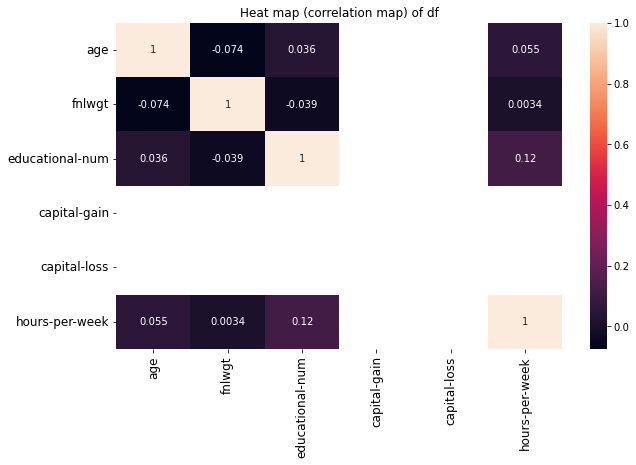

In [97]:
# let us see the heat map
plt.figure(figsize = (10,6))
sns.heatmap(data = df.corr(), annot = True)
plt.title('Heat map (correlation map) of df', fontsize = 12)
plt.xticks(rotation = 90, fontsize = 12)
plt.yticks( fontsize = 12)

In [98]:
data1 = data

In [99]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              48842 non-null  float64 
 1   workclass        48842 non-null  object  
 2   fnlwgt           48842 non-null  int64   
 3   education        48842 non-null  object  
 4   educational-num  48842 non-null  int64   
 5   marital-status   48842 non-null  object  
 6   occupation       48842 non-null  object  
 7   relationship     48842 non-null  object  
 8   race             48842 non-null  object  
 9   gender           48842 non-null  object  
 10  capital-gain     48842 non-null  int64   
 11  capital-loss     48842 non-null  int64   
 12  hours-per-week   48842 non-null  float64 
 13  native-country   48842 non-null  object  
 14  income           48842 non-null  object  
 15  Hour_range       48842 non-null  category
 16  Age_group        48842 non-null  categor

In [100]:
data1 = data1.drop(['Hour_range', 'Age_group'], axis = 1)

In [101]:
data1

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25.0,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40.000000,United-States,<=50K
1,38.0,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50.000000,United-States,<=50K
2,28.0,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40.000000,United-States,>50K
3,44.0,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40.000000,United-States,>50K
4,18.0,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,37.670792,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.000000,United-States,<=50K
48838,40.0,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40.000000,United-States,>50K
48839,58.0,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.000000,United-States,<=50K
48840,22.0,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,37.670792,United-States,<=50K


## Encoding Label using label encoder

In [102]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data1['income']= label_encoder.fit_transform(data1['income']) 
data1['workclass']= label_encoder.fit_transform(data1['workclass']) 
data1['marital-status']= label_encoder.fit_transform(data1['marital-status']) 
data1['occupation']= label_encoder.fit_transform(data1['occupation']) 
data1['relationship']= label_encoder.fit_transform(data1['relationship']) 
data1['race']= label_encoder.fit_transform(data1['race']) 
data1['gender']= label_encoder.fit_transform(data1['gender'])
data1['native-country']= label_encoder.fit_transform(data1['native-country']) 

In [103]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              48842 non-null  float64
 1   workclass        48842 non-null  int32  
 2   fnlwgt           48842 non-null  int64  
 3   education        48842 non-null  object 
 4   educational-num  48842 non-null  int64  
 5   marital-status   48842 non-null  int32  
 6   occupation       48842 non-null  int32  
 7   relationship     48842 non-null  int32  
 8   race             48842 non-null  int32  
 9   gender           48842 non-null  int32  
 10  capital-gain     48842 non-null  int64  
 11  capital-loss     48842 non-null  int64  
 12  hours-per-week   48842 non-null  float64
 13  native-country   48842 non-null  int32  
 14  income           48842 non-null  int32  
dtypes: float64(2), int32(8), int64(4), object(1)
memory usage: 4.1+ MB


In [104]:
### Standardizing the numerical columns
from sklearn.preprocessing import StandardScaler
stnd = StandardScaler()
data1['age']= stnd.fit_transform(data1[['age']])
data1['fnlwgt']= stnd.fit_transform(data1[['fnlwgt']])
data1['capital-gain']= stnd.fit_transform(data1[['capital-gain']])
data1['capital-loss']= stnd.fit_transform(data1[['capital-loss']])
data1['hours-per-week']= stnd.fit_transform(data1[['hours-per-week']])

In [105]:
data1

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,-1.005113,3,0.351675,11th,7,4,6,3,2,1,0.0,0.0,-0.127223,39,0
1,-0.033159,3,-0.945524,HS-grad,9,2,4,0,4,1,0.0,0.0,2.478810,39,0
2,-0.780816,1,1.394723,Assoc-acdm,12,2,10,0,4,1,0.0,0.0,-0.127223,39,1
3,0.415435,3,-0.277844,Some-college,10,2,6,0,2,1,0.0,0.0,-0.127223,39,1
4,-1.528473,3,-0.815954,Some-college,10,4,9,3,4,0,0.0,0.0,-0.734222,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.855582,3,0.640492,Assoc-acdm,12,2,12,5,4,0,0.0,0.0,-0.648430,39,0
48838,0.116372,3,-0.334178,HS-grad,9,2,6,0,4,1,0.0,0.0,-0.127223,39,1
48839,1.462155,3,-0.357510,HS-grad,9,6,0,4,4,0,0.0,0.0,-0.127223,39,0
48840,-1.229411,3,0.111984,HS-grad,9,4,0,3,4,1,0.0,0.0,-0.734222,39,0


#### Defining the input and output

In [106]:
data1 = data1.drop(['education'], axis = 1)
inputs = data1.drop(['income'], axis = 1)
outputs = data1['income']
print('the shape of the data is', data1.shape)
print('the shape of inputs is', inputs.shape)
print('the shape of outputs is', outputs.shape)

the shape of the data is (48842, 14)
the shape of inputs is (48842, 13)
the shape of outputs is (48842,)


In [107]:
inputs

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,-1.005113,3,0.351675,7,4,6,3,2,1,0.0,0.0,-0.127223,39
1,-0.033159,3,-0.945524,9,2,4,0,4,1,0.0,0.0,2.478810,39
2,-0.780816,1,1.394723,12,2,10,0,4,1,0.0,0.0,-0.127223,39
3,0.415435,3,-0.277844,10,2,6,0,2,1,0.0,0.0,-0.127223,39
4,-1.528473,3,-0.815954,10,4,9,3,4,0,0.0,0.0,-0.734222,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.855582,3,0.640492,12,2,12,5,4,0,0.0,0.0,-0.648430,39
48838,0.116372,3,-0.334178,9,2,6,0,4,1,0.0,0.0,-0.127223,39
48839,1.462155,3,-0.357510,9,6,0,4,4,0,0.0,0.0,-0.127223,39
48840,-1.229411,3,0.111984,9,4,0,3,4,1,0.0,0.0,-0.734222,39


In [108]:
outputs.value_counts()

0    37155
1    11687
Name: income, dtype: int64

#### dividing the data set into trainig and test sets

In [109]:
# dividing the data set into trainig and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.30, random_state=1)

# checking the shape of training and test data set
print('The shape of X_train', X_train.shape)
print('The shape of X_test' , X_test.shape)
print('The shape of y_train', y_train.shape)
print('The shape of y_test' , y_test.shape)

The shape of X_train (34189, 13)
The shape of X_test (14653, 13)
The shape of y_train (34189,)
The shape of y_test (14653,)


In [110]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
# Prediction using KNN Regressor
y_pred_knn = clf_knn.predict(X_test)
# score
from sklearn.metrics import f1_score
test_score_knn = f1_score(y_test, y_pred_knn)
train_score_knn = f1_score(y_train, clf_knn.predict(X_train))
print('Test score KNN classifier',test_score_knn )
print('Train score KNN classifier',train_score_knn )

# SVM classifier
from sklearn.svm import SVC
clf_svc = SVC()
clf_svc.fit(X_train, y_train)
# Prediction using SVR
y_pred_svc = clf_svc.predict(X_test)
# score
test_score_svc = f1_score(y_test, y_pred_svc)
train_score_svc = f1_score(y_train, clf_svc.predict(X_train))
print('Test score SVC',test_score_svc )
print('Train score SVC',train_score_svc )

## Logistic Regression
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
# Prediction using SVR
y_pred_lr = clf_lr.predict(X_test)
# score
test_score_lr = f1_score(y_test, y_pred_lr)
train_score_lr = f1_score(y_train, clf_lr.predict(X_train))
print('Test score Logistic Regrssion',test_score_lr )
print('Train score Logistic Regrssion',train_score_lr )

# Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
# predicting
y_pred_dt = clf_dt.predict(X_test)
# accuracy
from sklearn.metrics import f1_score
test_score_dt = f1_score(y_test, y_pred_dt)
train_score_dt = f1_score(y_train, clf_dt.predict(X_train))
print('Test score decision tree',test_score_dt )
print('Train score decision tree',train_score_dt )

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier()
clf_rfc.fit(X_train, y_train)
# Predicting with Random Forest Regressor
y_pred_rfg = clf_rfc.predict(X_test)
# score
test_score_rfc = f1_score(y_test, y_pred_rfg)
train_score_rfc = f1_score(y_train, clf_rfc.predict(X_train))
print('Test score Random forest',test_score_rfc )
print('Train score Random forest',train_score_rfc )

from sklearn.naive_bayes import GaussianNB
clf_gnb = RandomForestClassifier()
clf_gnb.fit(X_train, y_train)
# Predicting with Random Forest Regressor
y_pred_gnb = clf_gnb.predict(X_test)
# score
test_score_gnb = f1_score(y_test, y_pred_gnb)
train_score_gnb = f1_score(y_train, clf_gnb.predict(X_train))
print('Test score Guassian NB',test_score_gnb )
print('Train score Guassian NB',train_score_gnb )

from xgboost import XGBClassifier
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train, y_train)
# Predicting with Random Forest Regressor
y_pred_xgb = clf_xgb.predict(X_test)
# score
test_score_xgb = f1_score(y_test, y_pred_xgb)
train_score_xgb = f1_score(y_train, clf_xgb.predict(X_train))
print('Test score XGBoost',test_score_xgb )
print('Train score XGBoost',train_score_xgb )

Test score KNN classifier 0.5877074921489457
Train score KNN classifier 0.7100246401244975
Test score SVC 0.4127363184079602
Train score SVC 0.42818942465280774


C:\Users\ROHITH KUMAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test score Logistic Regrssion 0.4853333333333334
Train score Logistic Regrssion 0.49468494839007865
Test score decision tree 0.5314103453057828
Train score decision tree 0.99975442043222
Test score Random forest 0.6053403302978855
Train score Random forest 0.9996930820698545
Test score Guassian NB 0.6034774580704725
Train score Guassian NB 0.9996316758747698
Test score XGBoost 0.6254814358342321
Train score XGBoost 0.7319368951345618


In [111]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
  
# print('After OverSampling, the shape of train_X: {}'.format(X_train_smote.shape))
# print('After OverSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))
  
# print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote == 1)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote == 0)))


In [112]:
import imblearn
print(imblearn.__version__)

0.9.1


In [113]:
data2 = data1

In [114]:
data2 

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,-1.005113,3,0.351675,7,4,6,3,2,1,0.0,0.0,-0.127223,39,0
1,-0.033159,3,-0.945524,9,2,4,0,4,1,0.0,0.0,2.478810,39,0
2,-0.780816,1,1.394723,12,2,10,0,4,1,0.0,0.0,-0.127223,39,1
3,0.415435,3,-0.277844,10,2,6,0,2,1,0.0,0.0,-0.127223,39,1
4,-1.528473,3,-0.815954,10,4,9,3,4,0,0.0,0.0,-0.734222,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.855582,3,0.640492,12,2,12,5,4,0,0.0,0.0,-0.648430,39,0
48838,0.116372,3,-0.334178,9,2,6,0,4,1,0.0,0.0,-0.127223,39,1
48839,1.462155,3,-0.357510,9,6,0,4,4,0,0.0,0.0,-0.127223,39,0
48840,-1.229411,3,0.111984,9,4,0,3,4,1,0.0,0.0,-0.734222,39,0


In [115]:
#### Defining input and output to the models

In [116]:
inputs_ = data2.drop(['income'], axis = 1)
outputs_ = data2['income']
print('the shape of the data is', data2.shape)
print('the shape of inputs is', inputs.shape)
print('the shape of outputs is', outputs.shape)

the shape of the data is (48842, 14)
the shape of inputs is (48842, 13)
the shape of outputs is (48842,)


In [117]:
outputs.value_counts()

0    37155
1    11687
Name: income, dtype: int64

### There is a class imbalance. we will use SMOTE method to tackle the class imbalance problem

In [118]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(inputs_, outputs_)

In [119]:
x_smote

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,-1.005113,3,0.351675,7,4,6,3,2,1,0.0,0.0,-0.127223,39
1,-0.033159,3,-0.945524,9,2,4,0,4,1,0.0,0.0,2.478810,39
2,-0.780816,1,1.394723,12,2,10,0,4,1,0.0,0.0,-0.127223,39
3,0.415435,3,-0.277844,10,2,6,0,2,1,0.0,0.0,-0.127223,39
4,-1.528473,3,-0.815954,10,4,9,3,4,0,0.0,0.0,-0.734222,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74305,-0.776707,3,-0.795224,7,2,2,0,4,1,0.0,0.0,2.478810,39
74306,-0.329353,3,-0.999331,13,2,3,0,1,1,0.0,0.0,-0.127223,29
74307,0.474405,3,-1.064057,15,0,9,0,1,1,0.0,0.0,-0.372303,18
74308,0.448763,1,0.264082,14,2,3,0,4,1,0.0,0.0,2.478810,39


In [120]:
y_smote.value_counts()

0    37155
1    37155
Name: income, dtype: int64

#### the count of class 1 has increased from 11687 to 37155 equating the count of both classes.

#### dividing the data set into trainig and test sets

In [121]:
# dividing the data set into trainig and test sets
from sklearn.model_selection import train_test_split
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(x_smote, y_smote, test_size=0.30, random_state=1)

# checking the shape of training and test data set
print('The shape of X_train', X_train_sm.shape)
print('The shape of X_test' , X_test_sm.shape)
print('The shape of y_train', y_train_sm.shape)
print('The shape of y_test' , y_test_sm.shape)

The shape of X_train (52017, 13)
The shape of X_test (22293, 13)
The shape of y_train (52017,)
The shape of y_test (22293,)


In [122]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train_sm, y_train_sm)
# Prediction using KNN Regressor
y_pred_knn = clf_knn.predict(X_test_sm)
# score
from sklearn.metrics import f1_score
test_score_knn_sm = f1_score(y_test_sm, y_pred_knn)
train_score_knn_sm = f1_score(y_train_sm, clf_knn.predict(X_train_sm))
print('Test score KNN classifier',test_score_knn_sm )
print('Train score KNN classifier',train_score_knn_sm )

# SVM classifier
from sklearn.svm import SVC
clf_svc = SVC()
clf_svc.fit(X_train_sm, y_train_sm)
# Prediction using SVR
y_pred_svc = clf_svc.predict(X_test_sm)
# score
test_score_svc_sm = f1_score(y_test_sm, y_pred_svc)
train_score_svc_sm = f1_score(y_train_sm, clf_svc.predict(X_train_sm))
print('Test score SVC',test_score_svc_sm )
print('Train score SVC',train_score_svc_sm )

## Logistic Regression
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train_sm, y_train_sm)
# Prediction using SVR
y_pred_lr = clf_lr.predict(X_test_sm)
# score
test_score_lr_sm = f1_score(y_test_sm, y_pred_lr)
train_score_lr_sm = f1_score(y_train_sm, clf_lr.predict(X_train_sm))
print('Test score Logistic Regrssion',test_score_lr_sm )
print('Train score Logistic Regrssion',train_score_lr_sm )

# Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_sm, y_train_sm)
# predicting
y_pred_dt = clf_dt.predict(X_test_sm)
# accuracy
from sklearn.metrics import f1_score
test_score_dt_sm = f1_score(y_test_sm, y_pred_dt)
train_score_dt_sm = f1_score(y_train_sm, clf_dt.predict(X_train_sm))
print('Test score decision tree',test_score_dt_sm )
print('Train score decision tree',train_score_dt_sm)

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier()
clf_rfc.fit(X_train_sm, y_train_sm)
# Predicting with Random Forest Regressor
y_pred_rfg = clf_rfc.predict(X_test_sm)
# score
test_score_rfc_sm = f1_score(y_test_sm, y_pred_rfg)
train_score_rfc_sm = f1_score(y_train_sm, clf_rfc.predict(X_train_sm))
print('Test score Random forest',test_score_rfc_sm )
print('Train score Random forest',train_score_rfc_sm )

from sklearn.naive_bayes import GaussianNB
clf_gnb = RandomForestClassifier()
clf_gnb.fit(X_train_sm, y_train_sm)
# Predicting with Random Forest Regressor
y_pred_gnb = clf_gnb.predict(X_test_sm)
# score
test_score_gnb_sm = f1_score(y_test_sm, y_pred_gnb)
train_score_gnb_sm = f1_score(y_train_sm, clf_gnb.predict(X_train_sm))
print('Test score Guassian NB',test_score_gnb_sm )
print('Train score Guassian NB',train_score_gnb_sm )

from xgboost import XGBClassifier
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train_sm, y_train_sm)
# Predicting with Random Forest Regressor
y_pred_xgb = clf_xgb.predict(X_test_sm)
# score
test_score_xgb_sm = f1_score(y_test_sm, y_pred_xgb)
train_score_xgb_sm = f1_score(y_train_sm, clf_xgb.predict(X_train_sm))
print('Test score XGBoost',test_score_xgb_sm )
print('Train score XGBoost',train_score_xgb_sm )

Test score KNN classifier 0.8461441585155957
Train score KNN classifier 0.8897324656543745
Test score SVC 0.7694791401138584
Train score SVC 0.7722004925394756


C:\Users\ROHITH KUMAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test score Logistic Regrssion 0.740599334073252
Train score Logistic Regrssion 0.7439185366773524
Test score decision tree 0.825771162123386
Train score decision tree 0.9999615014436959
Test score Random forest 0.8740786511894779
Train score Random forest 0.9999422577230295
Test score Guassian NB 0.8741786108048512
Train score Guassian NB 0.9999230088154908
Test score XGBoost 0.8858744800144691
Train score XGBoost 0.9089578397950733


In [123]:
### DataFrame with the scores
score_df = pd.DataFrame({'Model': ['Decision Tree Classifier', 'Random Forest Classifier','KNN Classifier',
                                   'Support Vector Classifier', 'Logistic Regression', 'Guassian Naive Bayes','XGBoost'],
                       'Test Score': [test_score_dt, test_score_rfc,test_score_knn,test_score_svc, test_score_lr, test_score_gnb,test_score_xgb],
                       'Train Score': [train_score_dt,train_score_rfc, train_score_knn, train_score_svc, train_score_lr, train_score_gnb,train_score_xgb ],
                         'Test Score sm': [test_score_dt_sm, test_score_rfc_sm,test_score_knn_sm,test_score_svc_sm, test_score_lr_sm, test_score_gnb_sm,test_score_xgb_sm],
                       'Train Score sm': [train_score_dt_sm,train_score_rfc_sm, train_score_knn_sm, train_score_svc_sm, train_score_lr_sm, train_score_gnb_sm,train_score_xgb_sm]})

In [124]:
score_df

,Model,Test Score,Train Score,Test Score sm,Train Score sm
0,Decision Tree Classifier,0.531410,0.999754,0.825771,0.999962
1,Random Forest Classifier,0.605340,0.999693,0.874079,0.999942
2,KNN Classifier,0.587707,0.710025,0.846144,0.889732
3,Support Vector Classifier,0.412736,0.428189,0.769479,0.772200
4,Logistic Regression,0.485333,0.494685,0.740599,0.743919
5,Guassian Naive Bayes,0.603477,0.999632,0.874179,0.999923
6,XGBoost,0.625481,0.731937,0.885874,0.908958


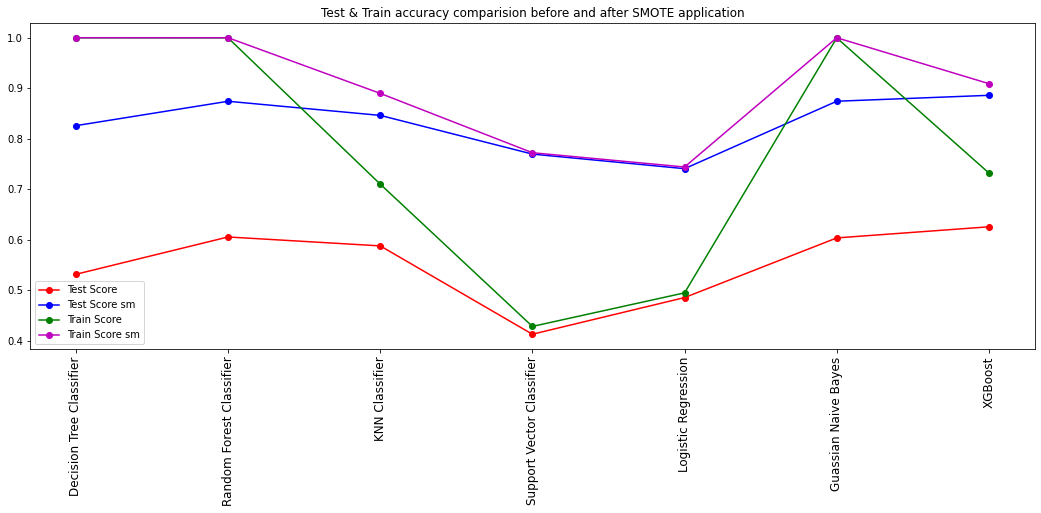

In [134]:
plt.figure(figsize = (18,6))
plt.plot(score_df['Model'], score_df['Test Score'], marker = 'o',color = 'r', label ='Test Score')
plt.plot(score_df['Model'], score_df['Test Score sm'], marker = 'o',color = 'b', label ='Test Score sm')
plt.plot(score_df['Model'], score_df['Train Score'], marker = 'o',color = 'g', label ='Train Score')
plt.plot(score_df['Model'], score_df['Train Score sm'], marker = 'o',color = 'm', label ='Train Score sm')

plt.legend()
plt.xticks(rotation = 90, fontsize = 12)
plt.title('Test & Train accuracy comparision before and after SMOTE application')
plt.show()

### Hypotheses Testing
    1. We will use Chi-Square Test to find the relation between Gender and Income.
    2. These two are categorical variables
    3. Null Hypotheses - There is no relation between Gender and Income
    4. Alternate Hypotheses - There is relation between Gender and Income

In [126]:
data3 = data

In [127]:
data3

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Hour_range,Age_group
0,25.0,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40.000000,United-States,<=50K,"[33.667, 66.333)","[17.0, 35.25)"
1,38.0,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50.000000,United-States,<=50K,"[33.667, 66.333)","[35.25, 53.5)"
2,28.0,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40.000000,United-States,>50K,"[33.667, 66.333)","[17.0, 35.25)"
3,44.0,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40.000000,United-States,>50K,"[33.667, 66.333)","[35.25, 53.5)"
4,18.0,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,37.670792,United-States,<=50K,"[1.0, 33.667)","[17.0, 35.25)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27.0,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.000000,United-States,<=50K,"[33.667, 66.333)","[17.0, 35.25)"
48838,40.0,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40.000000,United-States,>50K,"[33.667, 66.333)","[35.25, 53.5)"
48839,58.0,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.000000,United-States,<=50K,"[33.667, 66.333)","[53.5, 71.75)"
48840,22.0,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,37.670792,United-States,<=50K,"[1.0, 33.667)","[17.0, 35.25)"


In [128]:
contingencytable = pd.crosstab(index = data3['gender'], columns = data3['income'])

In [129]:
contingencytable

income,<=50K,>50K
gender,,
Female,14423,1769
Male,22732,9918


In [130]:
from scipy.stats import chi2_contingency
chi_sq, p_value, degree_freedom, expected_table = chi2_contingency(contingencytable)
print('chi-square value is', chi_sq, '\n', 'p_value is', p_value, '\n', 'expected table is', expected_table, '\n')
alpha = 0.05
print("p value is " + str(p_value))
if p_value <= alpha:
    print('There is relation between Gender and Income (reject H0)')
else:
    print('There is no relation between Gender and Income (H0 holds true)')

chi-square value is 2248.847679013691 
 p_value is 0.0 
 expected table is [[12317.54964989  3874.45035011]
 [24837.45035011  7812.54964989]] 

p value is 0.0
There is relation between Gender and Income (reject H0)


#### Hypothesis testing on Occupation and Gender
    1. We will use Chi-Square Test to find the relation between Gender and Occupation.
    2. These two are categorical variables
    3. Null Hypotheses - There is no relation between Gender and Occupation
    4. Alternate Hypotheses - There is relation between Gender and Occupation

In [131]:
contingencytable1 = pd.crosstab(index = data3['occupation'], columns = data3['gender'])

In [132]:
contingencytable1

gender,Female,Male
occupation,,
Adm-clerical,3769,1842
Armed-Forces,0,15
Craft-repair,323,5789
Exec-managerial,1748,4338
Farming-fishing,95,1395
Handlers-cleaners,254,1818
Machine-op-inspct,804,2218
Other-service,2698,2225
Priv-house-serv,228,14


In [133]:
from scipy.stats import chi2_contingency
chi_sq1, p_value1, degree_freedom1, expected_table1 = chi2_contingency(contingencytable1)
print('chi-square value is', chi_sq1, '\n', 'p_value is', p_value1, '\n', 'expected table is', expected_table1, '\n')
alpha = 0.05
print("p value is " + str(p_value1))
if p_value1 <= alpha:
    print('There is relation between Gender and Occupation (reject H0)')
else:
    print('There is no relation between Gender and Occupation (H0 holds true)')

chi-square value is 8719.056189912115 
 p_value is 0.0 
 expected table is [[1.86014725e+03 3.75085275e+03]
 [4.97276934e+00 1.00272307e+01]
 [2.02623775e+03 4.08576225e+03]
 [2.01761828e+03 4.06838172e+03]
 [4.93961754e+02 9.96038246e+02]
 [6.86905205e+02 1.38509480e+03]
 [1.00184726e+03 2.02015274e+03]
 [1.63206290e+03 3.29093710e+03]
 [8.02273453e+01 1.61772655e+02]
 [2.97736276e+03 6.00363724e+03]
 [3.25882151e+02 6.57117849e+02]
 [1.82467483e+03 3.67932517e+03]
 [4.79374964e+02 9.66625036e+02]
 [7.80724786e+02 1.57427521e+03]] 

p value is 0.0
There is relation between Gender and Occupation (reject H0)
